In [690]:
# Necessary Libraries and Import Operations
import pandas as pd  # For data manipulation and analysis
import numpy as np   # For numerical operations
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For enhanced data visualization
import missingno as msno  # For missing data visualization

import warnings
warnings.filterwarnings(action="ignore", category=FutureWarning)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 500)

In [691]:
# Loading the Datasets
credit_df = pd.read_csv('/content/drive/MyDrive/datasets/case_credit.csv')
payment_df = pd.read_csv('/content/drive/MyDrive/datasets/case_payment.csv')
payment_plan_df = pd.read_csv('/content/drive/MyDrive/datasets/case_payment_plan.csv')
user_df = pd.read_csv('/content/drive/MyDrive/datasets/case_user.csv')

In [692]:
credit_df.shape

(595, 6)

In [693]:
payment_df.shape

(414, 4)

In [694]:
payment_plan_df.shape

(595, 7)

In [695]:
user_df.shape

(573, 4)

In [696]:
# Joining the credit_df with the user_df on 'user_id' using an outer join
df = pd.merge(credit_df, user_df, on='user_id', how='outer')

# Joining the result with payment_plan_df on 'credit_id' using an outer join
df = pd.merge(df, payment_plan_df, on='credit_id', how='outer')

# Joining the result with payment_df on 'payment_plan_id' using an outer join
df = pd.merge(df, payment_df, on='payment_plan_id', how='outer')

## Exploratory Data Analysis (EDA)
 To understand a dataset's structure and key patterns through visualizations and basic statistics, aiming to identify trends, relationships, anomalies, and missing data


In [697]:
# The Big Picture: Overview of the dataset and its structure
def check_df(dataframe, head=5):
    print("##### Shape #####")
    print(dataframe.shape)
    print("##### Types #####")
    print(dataframe.dtypes)
    print("##### Head #####")
    print(dataframe.head())
    print("##### Tail #####")
    print(dataframe.tail())
    print("##### NA #####")
    print(dataframe.isnull().sum())
    print("##### Quantiles #####")
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)


In [698]:
check_df(df)

##### Shape #####
(600, 18)
##### Types #####
user_id                          object
credit_id                       float64
credit_amount                   float64
credit_service_fee              float64
credit_auto_repayment           float64
app_name                         object
birthdate                        object
gender                           object
city                             object
payment_plan_id                   int64
payment_plan_base_amount        float64
payment_plan_interest_amount    float64
payment_plan_late_amount        float64
payment_plan_duedate             object
payment_plan_status              object
payment_id                      float64
payment_amount                  float64
payment_date                     object
dtype: object
##### Head #####
                                user_id  credit_id  credit_amount  credit_service_fee  credit_auto_repayment     app_name            birthdate  gender     city  payment_plan_id  payment_plan_base_amount 

In [699]:
# Correcting data types: Convert 'birthdate', 'payment_date', and 'payment_plan_duedate' to datetime format
df['birthdate'] = pd.to_datetime(df['birthdate'])
df['payment_date'] = pd.to_datetime(df['payment_date'])
df['payment_plan_duedate'] = pd.to_datetime(df['payment_plan_duedate'])

In [700]:
# Capturing Numerical and Categorical Columns
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """
    Gives the names of categorical, numerical, and cardinal categorical variables in the dataset.
    Note: Numerical-looking categorical variables are also included in the categorical variables.

    Parameters
    ------
        dataframe: dataframe
                The dataframe from which the variable names will be extracted
        cat_th: int, optional
                Class threshold value for numerical but categorical variables
        car_th: int, optional
                Class threshold value for cardinal but categorical variables

    Returns
    ------
        cat_cols: list
                List of categorical variables
        num_cols: list
                List of numerical variables
        cat_but_car: list
                List of cardinal categorical variables

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = total number of variables
        num_but_cat is included in cat_cols.
        The sum of the returned 3 lists equals the total number of variables: cat_cols + num_cols + cat_but_car = total number of variables

    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car, num_but_cat

In [701]:
cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(df)

Observations: 600
Variables: 18
cat_cols: 7
num_cols: 10
cat_but_car: 1
num_but_cat: 3


In [702]:
print(f"Categorical Columns: {cat_cols}")
print(f"\nNumerical Columns: {num_cols}")
print(f"\nCardinal Categorical Columns: {cat_but_car}")

Categorical Columns: ['app_name', 'gender', 'city', 'payment_plan_status', 'credit_service_fee', 'credit_auto_repayment', 'payment_plan_interest_amount']

Numerical Columns: ['credit_id', 'credit_amount', 'birthdate', 'payment_plan_id', 'payment_plan_base_amount', 'payment_plan_late_amount', 'payment_plan_duedate', 'payment_id', 'payment_amount', 'payment_date']

Cardinal Categorical Columns: ['user_id']


In [703]:
# List of Numerical ID columns to exclude
num_id_cols = ["credit_id", "payment_plan_id", "payment_id"]

num_cols = [col for col in num_cols if col not in num_id_cols]

In [704]:
num_cols

['credit_amount',
 'birthdate',
 'payment_plan_base_amount',
 'payment_plan_late_amount',
 'payment_plan_duedate',
 'payment_amount',
 'payment_date']

In [705]:
# Distribution of Numerical and Categorical Variables in the Data
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe, palette='husl', order=dataframe[col_name].value_counts().index )
        plt.show(block=True)

    print("#####################################################################")

def num_summary(dataframe, numerical_cols, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_cols].describe(quantiles).T)

    if plot:
        dataframe[numerical_cols].hist()
        plt.xlabel(numerical_cols)
        plt.title(numerical_cols)
        plt.show(block=True)

             app_name      Ratio
app_name                        
Dummy App 1       569  94.833333
Dummy App 2        30   5.000000


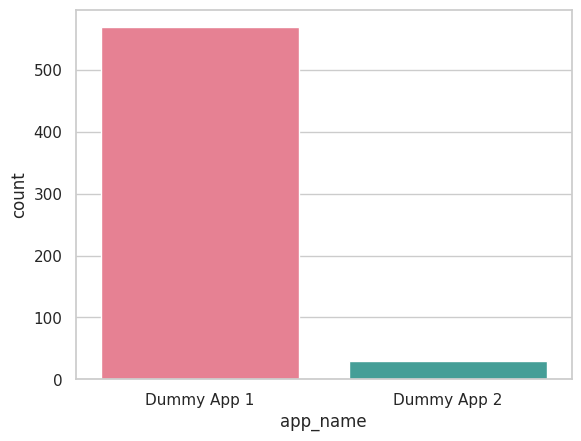

#####################################################################
        gender      Ratio
gender                   
male       270  45.000000
female     262  43.666667


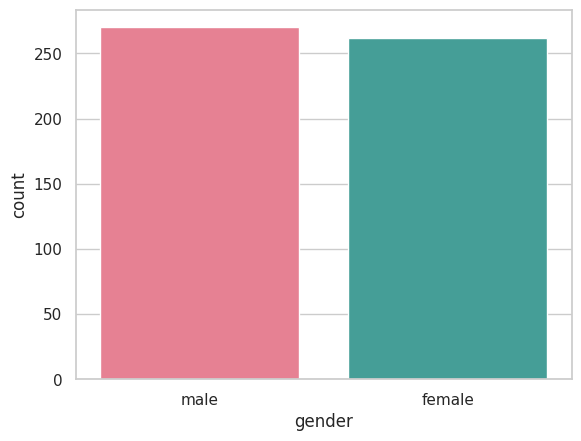

#####################################################################
          city      Ratio
city                     
Adana       97  16.166667
İstanbul    94  15.666667
Trabzon     87  14.500000
Bursa       87  14.500000
Ankara      85  14.166667
İzmir       82  13.666667


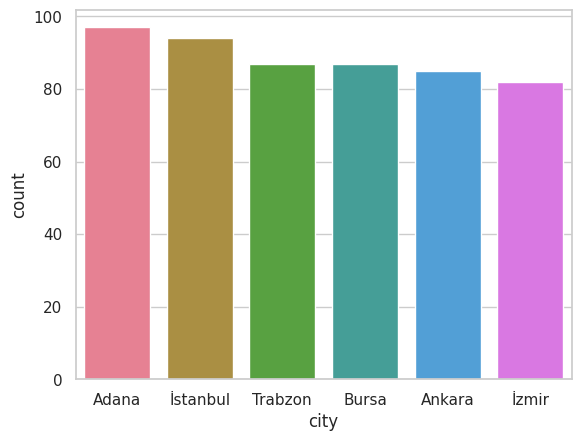

#####################################################################
                     payment_plan_status      Ratio
payment_plan_status                                
PAID                                 375  62.500000
UNPAID                               100  16.666667
LATE                                  66  11.000000


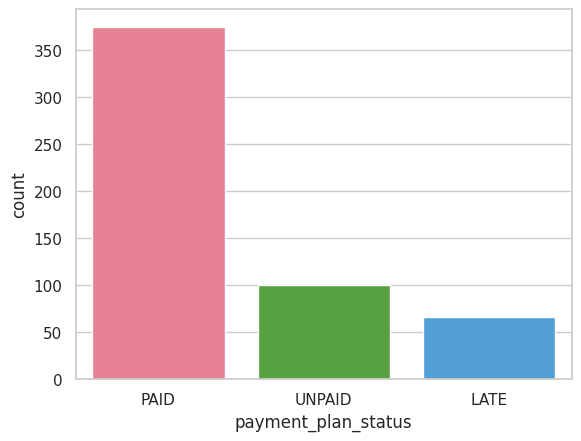

#####################################################################
                    credit_service_fee      Ratio
credit_service_fee                               
0.0                                578  96.333333
1.0                                  9   1.500000
2.5                                  9   1.500000
1.5                                  3   0.500000


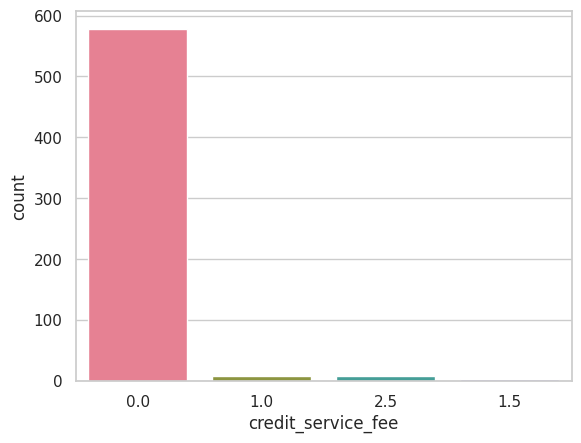

#####################################################################
                       credit_auto_repayment      Ratio
credit_auto_repayment                                  
1.0                                      544  90.666667
0.0                                       55   9.166667


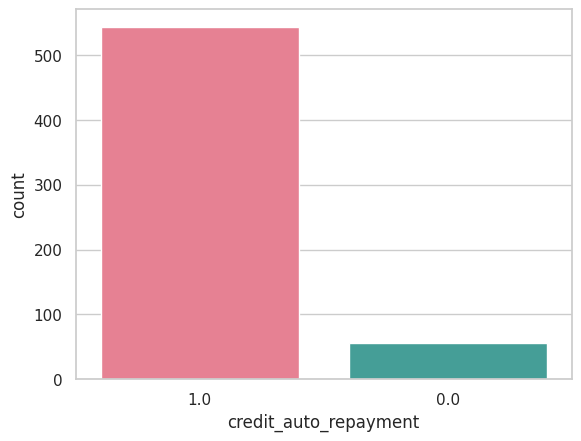

#####################################################################
                              payment_plan_interest_amount      Ratio
payment_plan_interest_amount                                         
0.00                                                   589  98.166667
5.00                                                     4   0.666667
3.75                                                     2   0.333333
4.00                                                     1   0.166667
11.25                                                    1   0.166667
5.94                                                     1   0.166667
1.27                                                     1   0.166667


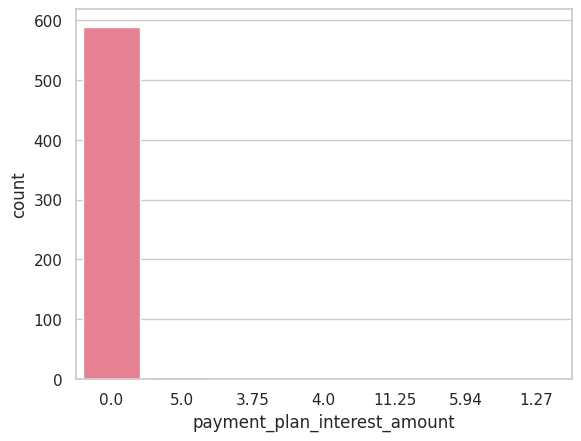

#####################################################################


In [706]:
for col in cat_cols:
    cat_summary(df, col, plot=True)

count    599.000000
mean      96.954457
std      106.988234
min        2.250000
5%         5.731000
10%        9.894000
20%       16.688000
30%       24.890000
40%       41.460000
50%       63.000000
60%       87.976000
70%      104.798000
80%      154.420000
90%      240.000000
95%      338.394000
99%      497.426000
max      500.000000
Name: credit_amount, dtype: float64


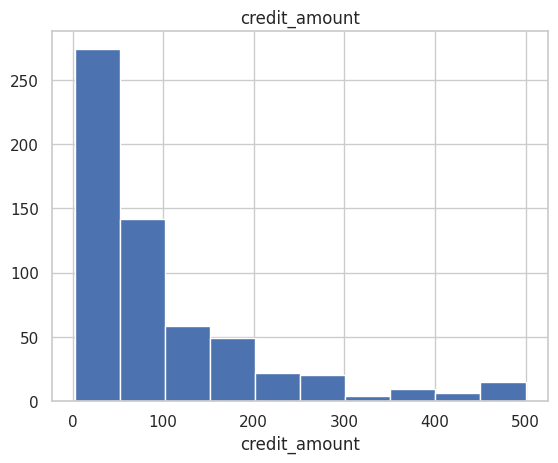

count                              597
mean     1980-02-26 02:19:50.512562816
min                1960-01-15 07:49:03
5%          1962-08-22 21:14:58.800000
10%         1963-11-26 11:01:28.800000
20%      1968-06-28 04:42:29.400000008
30%      1972-06-13 06:38:47.199999984
40%         1975-10-08 02:04:02.400000
50%                1979-12-28 04:00:18
60%      1984-01-08 07:25:30.799999936
70%      1988-03-14 23:47:31.799999936
80%         1992-04-02 22:25:13.600000
90%      1996-03-27 04:45:03.399999872
95%      1998-01-07 03:47:35.599999872
99%         1999-09-29 02:06:04.080000
max                1999-12-30 23:39:03
Name: birthdate, dtype: object


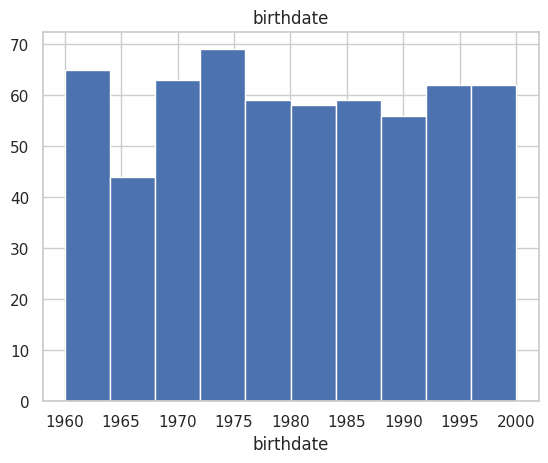

count    599.000000
mean      97.014558
std      106.981540
min        2.250000
5%         5.731000
10%        9.894000
20%       16.688000
30%       24.890000
40%       41.460000
50%       63.000000
60%       87.976000
70%      104.798000
80%      154.420000
90%      240.000000
95%      338.394000
99%      497.426000
max      500.000000
Name: payment_plan_base_amount, dtype: float64


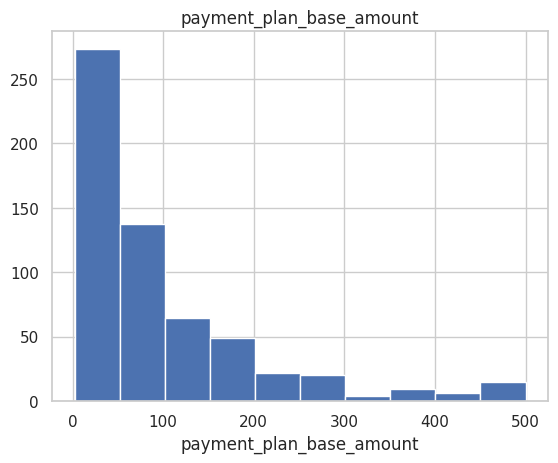

count    599.000000
mean       1.144558
std        4.163131
min        0.000000
5%         0.000000
10%        0.000000
20%        0.000000
30%        0.000000
40%        0.000000
50%        0.000000
60%        0.000000
70%        0.046000
80%        0.604000
90%        2.604000
95%        6.507000
99%       19.758200
max       61.680000
Name: payment_plan_late_amount, dtype: float64


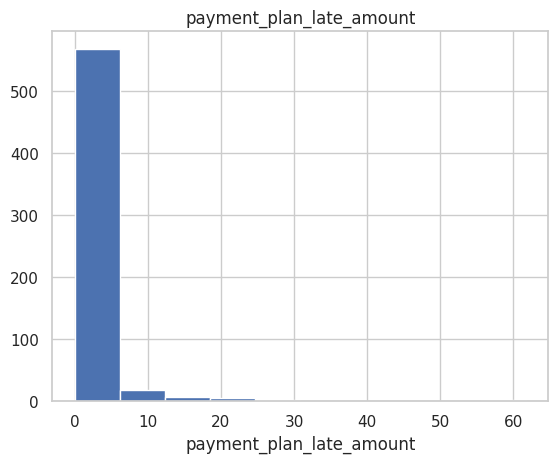

count                              599
mean     2021-11-12 14:33:36.717863168
min                2020-11-14 15:39:09
5%                 2021-05-19 08:03:56
10%         2021-07-04 11:07:49.800000
20%                2021-09-07 16:57:53
30%                2021-10-16 13:42:31
40%         2021-11-12 06:33:09.800000
50%                2021-12-08 11:07:06
60%         2021-12-30 09:44:10.600000
70%                2022-01-11 01:17:27
80%                2022-01-23 01:17:12
90%                2022-02-04 14:09:04
95%         2022-02-11 12:47:10.300000
99%         2022-02-17 19:57:18.180000
max                2022-02-19 10:26:42
Name: payment_plan_duedate, dtype: object


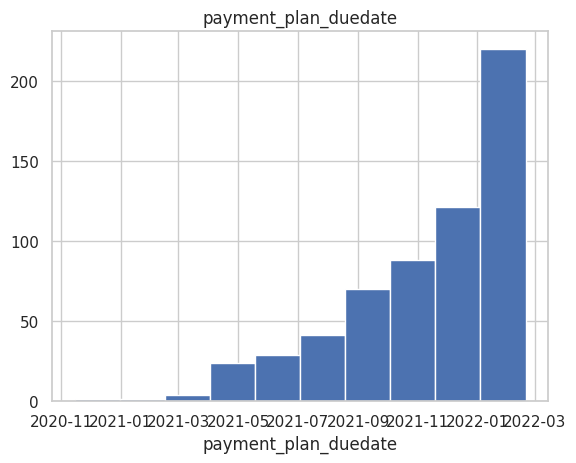

count    414.000000
mean      92.069541
std      103.625135
min        2.500000
5%         4.765000
10%        8.655000
20%       16.000000
30%       23.260000
40%       37.544000
50%       58.805000
60%       80.088000
70%      102.766000
80%      148.122000
90%      231.338000
95%      291.155000
99%      496.158400
max      528.890000
Name: payment_amount, dtype: float64


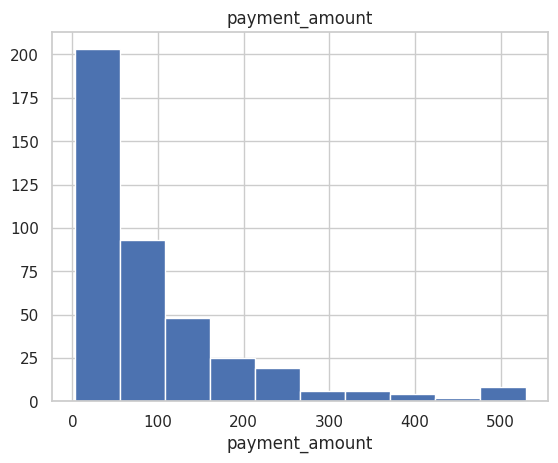

count                              414
mean     2021-10-21 23:24:13.927535872
min                2021-02-14 16:26:14
5%       2021-05-13 12:55:32.550000128
10%         2021-06-20 10:30:18.200000
20%         2021-08-12 02:36:21.400000
30%         2021-09-23 09:58:05.400000
40%         2021-10-22 12:53:50.200000
50%                2021-11-13 19:00:40
60%         2021-12-01 05:24:43.600000
70%         2021-12-15 17:24:21.300000
80%         2021-12-29 02:33:43.200000
90%         2022-01-11 11:11:05.600000
95%      2022-01-15 08:47:14.149999872
99%         2022-01-19 05:28:00.020000
max                2022-01-20 07:44:26
Name: payment_date, dtype: object


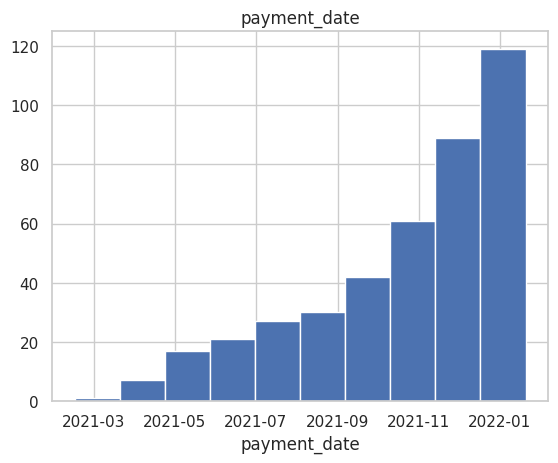

In [707]:
for col in num_cols:
    num_summary(df, col, plot=True)

In [708]:
# Examining categorical variables wrt the target variable
def target_summary_with_cat(dataframe, target, categorical_col):
    """
    Calculates and prints the summary statistics of a target variable
    based on a categorical column, including handling of missing values.

    Parameters
    ----------
    dataframe: pd.DataFrame
        The input DataFrame.
    target: str
        The name of the target variable column.
    categorical_col: str
        The name of the categorical column.

    Returns
    -------
    None
    """

    # Group by the categorical column and target variable (excluding NaN in target)
    value_counts = dataframe.loc[dataframe[target].notna()].groupby(categorical_col)[target].value_counts()

    # Create a summary DataFrame
    summary_df = value_counts.reset_index(name='COUNT')

    # Calculate the ratio, including NaN values in the denominator
    # Get the total counts grouped by the categorical column (including NaN values)
    group_counts = dataframe.groupby(categorical_col)[target].size()

    # Calculate the ratio
    summary_df['RATIO'] = summary_df.apply(lambda row: row['COUNT'] / group_counts.loc[row[categorical_col]], axis=1)

    # Print the summary DataFrame
    print(summary_df)
    print("#####################################################################")


In [709]:
for col in cat_cols:
    target_summary_with_cat(df, "payment_plan_status", col)

      app_name payment_plan_status  COUNT     RATIO
0  Dummy App 1                PAID    355  0.623902
1  Dummy App 1              UNPAID     99  0.173989
2  Dummy App 1                LATE     60  0.105448
3  Dummy App 2                PAID     20  0.666667
4  Dummy App 2                LATE      6  0.200000
5  Dummy App 2              UNPAID      1  0.033333
#####################################################################
   gender payment_plan_status  COUNT     RATIO
0  female                PAID    175  0.667939
1  female              UNPAID     44  0.167939
2  female                LATE     36  0.137405
3    male                PAID    176  0.651852
4    male              UNPAID     55  0.203704
5    male                LATE     29  0.107407
#####################################################################
        city payment_plan_status  COUNT     RATIO
0      Adana                PAID     66  0.680412
1      Adana              UNPAID     16  0.164948
2      Adana     

In [710]:
# Analyzing numerical variables with the target variable
def target_summary_with_num(dataframe, target, numerical_col):
    """
    Calculates and prints the mean of a numerical column
    grouped by the target variable.

    Args:
        dataframe (pd.DataFrame): The input DataFrame.
        target (str): The name of the target variable column.
        numerical_col (str): The name of the numerical column.
    """
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")

In [711]:
for col in num_cols:
    target_summary_with_num(df, "payment_plan_status", col)

                     credit_amount
payment_plan_status               
LATE                    105.655909
PAID                     92.755787
UNPAID                  105.896600


                                        birthdate
payment_plan_status                              
LATE                1981-02-20 21:07:18.030303040
PAID                1979-12-15 19:01:13.806970496
UNPAID              1981-04-14 03:37:11.170000000


                     payment_plan_base_amount
payment_plan_status                          
LATE                               105.724091
PAID                                92.821120
UNPAID                             105.921600


                     payment_plan_late_amount
payment_plan_status                          
LATE                                 6.187273
PAID                                 0.576987
UNPAID                               0.000000


                             payment_plan_duedate
payment_plan_status                              
LATE   

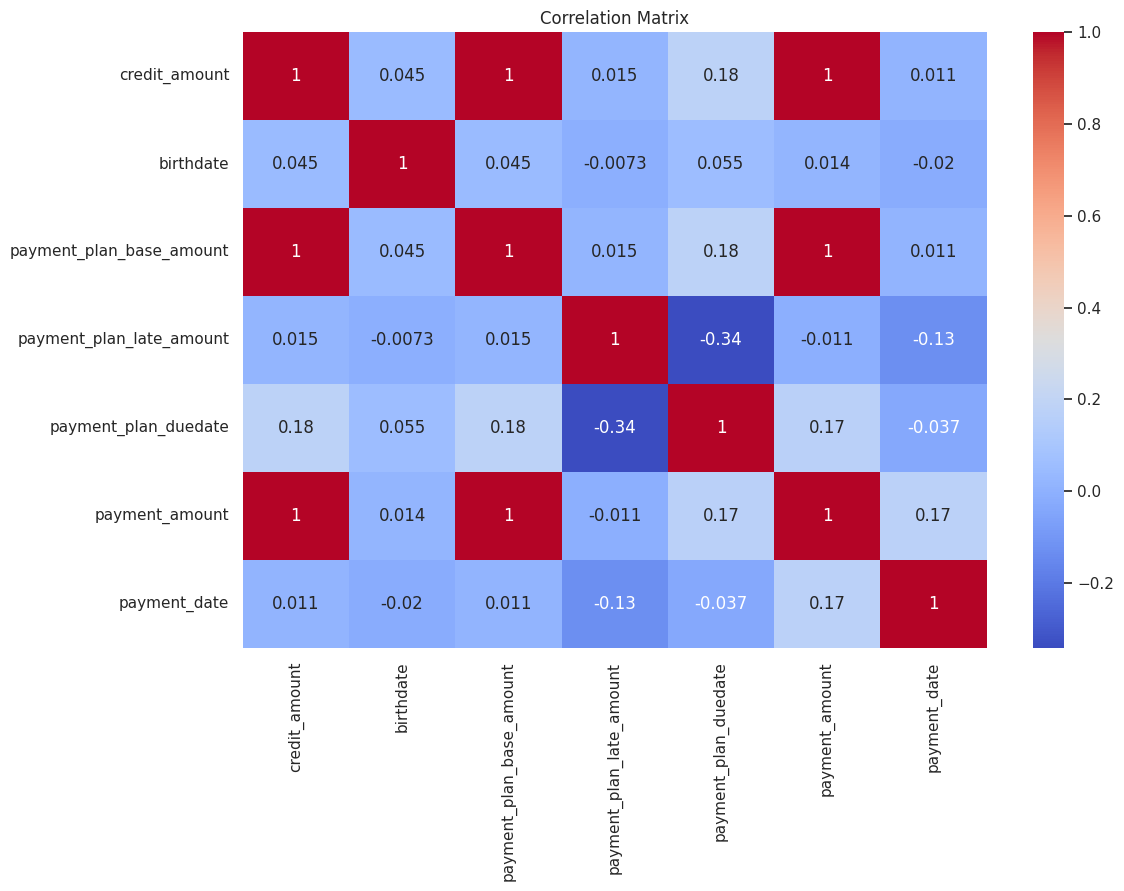

In [712]:
# Correlation Analysis
corr = df[num_cols].corr(method="spearman")


# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

The variables payment_plan_base_amount, credit_amount, and payment_amount have a perfect positive linear relationship between them since the correlation is 1. If a user pays exactly the expected amount according to the payment plan, it is normal for the expected and paid values to be equal. In this case, the user is acting in accordance with the payment plan.

In [713]:
df[["payment_plan_status","payment_plan_base_amount","credit_amount","payment_amount"]]

,payment_plan_status,payment_plan_base_amount,credit_amount,payment_amount
0,UNPAID,96.94,96.94,NaN
1,PAID,297.20,297.20,297.20
2,PAID,189.38,189.38,189.38
3,PAID,22.35,22.35,22.35
4,PAID,40.30,40.30,40.30
5,LATE,56.00,56.00,NaN
6,LATE,471.95,471.95,NaN
7,LATE,150.00,150.00,NaN
8,PAID,49.90,49.90,49.90
9,PAID,2.37,2.37,2.54


In [714]:
df[df['payment_plan_base_amount']!=df['credit_amount']]

,user_id,credit_id,credit_amount,credit_service_fee,credit_auto_repayment,app_name,birthdate,gender,city,payment_plan_id,payment_plan_base_amount,payment_plan_interest_amount,payment_plan_late_amount,payment_plan_duedate,payment_plan_status,payment_id,payment_amount,payment_date
109,cad72e77-1111-1111-1111-bc772ae50cd4,73696.0,80.00,1.0,1.0,Dummy App 2,1990-12-31 10:22:52,female,Ankara,26460,81.00,0.0,5.62,2021-11-28 07:19:28,LATE,NaN,NaN,NaT
166,9ed37cf1-1111-1111-1111-4acf4441e6c2,66560.0,100.00,1.5,1.0,Dummy App 2,1989-12-04 10:45:01,male,Adana,34824,101.50,0.0,1.22,2021-12-19 14:38:00,PAID,69084.0,102.72,2021-12-29 13:57:37
222,353a5c03-1111-1111-1111-df1177df5c9c,39479.0,30.00,1.0,1.0,Dummy App 2,1967-09-26 08:43:37,female,Bursa,42849,31.00,0.0,5.54,2021-09-07 20:19:31,LATE,NaN,NaN,NaT
226,f7688ad5-1111-1111-1111-ddc08432142a,77706.0,100.00,2.5,1.0,Dummy App 2,1995-04-30 23:04:43,male,İstanbul,43592,102.50,0.0,0.00,2022-01-03 22:57:25,PAID,42727.0,102.50,2021-12-21 21:15:25
321,ac2711d1-1111-1111-1111-0bad12af96dc,24237.0,100.00,2.5,0.0,Dummy App 2,1977-02-16 21:59:24,female,Adana,58331,102.50,0.0,7.79,2021-08-08 18:01:36,PAID,10634.0,110.29,2021-10-05 19:09:00
322,9b1874d0-1111-1111-1111-f6048ff39638,65513.0,100.00,2.5,1.0,Dummy App 2,1970-07-15 04:43:18,male,Bursa,58340,102.50,0.0,0.00,2022-02-11 11:09:45,NaN,NaN,NaN,NaT
334,71491ead-1111-1111-1111-9d385ed81135,71507.0,100.00,2.5,1.0,Dummy App 2,1977-09-07 05:12:16,male,İstanbul,59825,102.50,0.0,0.68,2022-01-14 12:28:59,LATE,NaN,NaN,NaT
351,6017f972-1111-1111-1111-9ff92227118c,23043.0,50.00,2.5,1.0,Dummy App 2,1974-04-27 08:46:06,male,İzmir,61566,52.50,0.0,0.00,2021-11-03 11:20:31,PAID,46914.0,52.50,2021-10-09 19:42:17
368,a8ff0d0a-1111-1111-1111-eea9f08db73a,85676.0,100.00,1.5,1.0,Dummy App 2,1961-01-04 21:55:59,NaN,NaN,63654,101.50,0.0,0.00,2021-09-30 16:43:32,PAID,84008.0,101.50,2021-09-23 07:05:39
390,26f516d9-1111-1111-1111-317977f1270e,21583.0,32.21,1.0,0.0,Dummy App 2,1998-01-02 10:17:12,female,Ankara,67215,33.21,0.0,0.84,2021-12-04 17:01:22,PAID,29239.0,34.05,2021-12-24 22:29:02


# Data Cleaning


In [715]:
# Check for duplicates
duplicate_count = df.duplicated().sum()
print(f'Number of duplicate rows: {duplicate_count}')

Number of duplicate rows: 6


In [716]:
# Remove duplicates, keeping the first occurrence
df.drop_duplicates(keep='first',inplace=True)

### Outlier Analysis

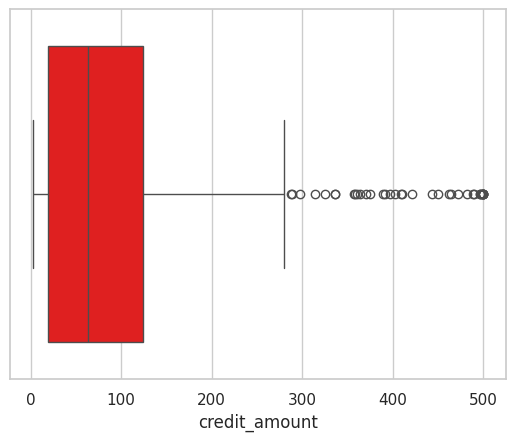

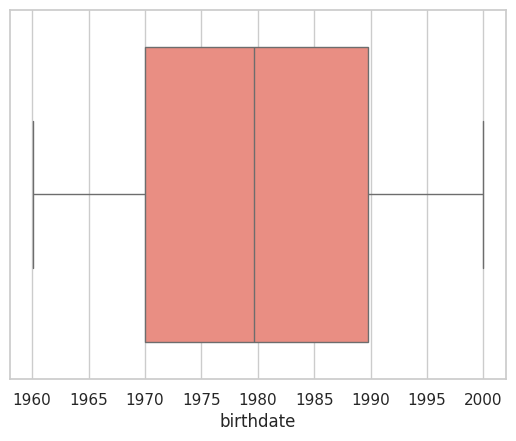

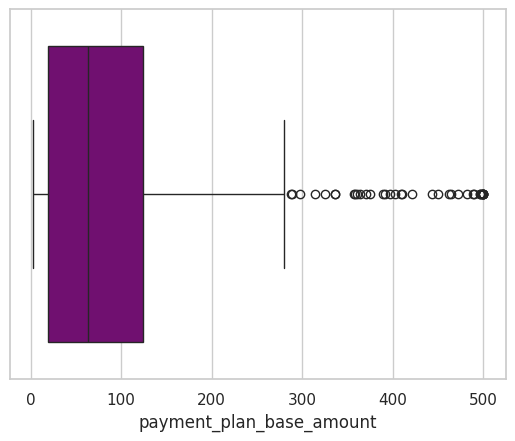

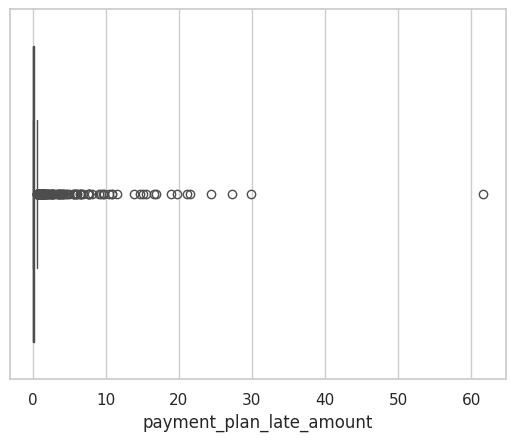

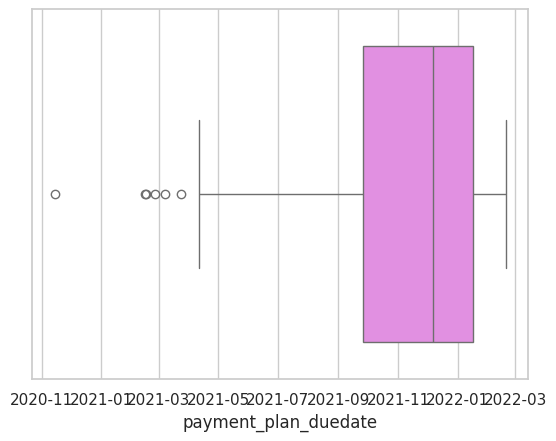

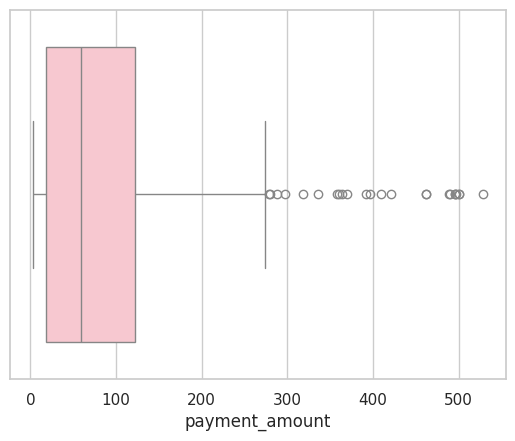

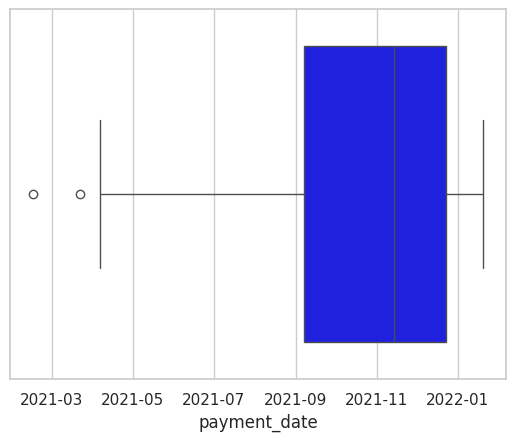

In [717]:
# Define a list of colors
colors = ["red", "salmon", "purple", "magenta", "violet","pink", "blue", "green","turquoise","cyan"]  # Add more if needed

# Iterate through numerical columns and apply different colors
for i, col in enumerate(num_cols):
    sns.boxplot(x=df[col], data=df, color=colors[i % len(colors)])  # Apply color based on index
    plt.show(block=True)

The reason I use 0.1 and 0.9 as threshold values is that they cover a wider range of values and detect fewer outliers. This helps preserve more data at the extreme ends. In contrast, the 0.25 and 0.75 thresholds are stricter and label more data points near the extremes as outliers. Therefore, I opted for the 0.1 and 0.9 approach to retain more data and avoid cutting off too many outliers unnecessarily.


In [718]:
# Outlier Detection
def outlier_thresholds(dataframe, col_name, q1=0.1, q3=0.9):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit


def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False


for col in num_cols:
        print(col, check_outlier(df, col))

credit_amount False
birthdate False
payment_plan_base_amount False
payment_plan_late_amount True
payment_plan_duedate False
payment_amount False
payment_date False


The following function is designed to replace outliers in the specified variable
with predetermined lower and upper threshold values. However, for this analysis,
we choose not to replace these outliers. Instead, we will retain the original data
to maintain the integrity of our dataset and to avoid potential biases that may arise
from modifying the original values. This approach ensures that we preserve
the true representation of the data and allows us to capture valuable insights
that outliers may provide.

In [719]:
# Outlier replacement method using thresholds
# def replace_with_thresholds(dataframe, variable):
#     # Determining outlier thresholds
#     low_limit, up_limit = outlier_thresholds(dataframe, variable)

#     # Replacing outliers with lower and upper thresholds
#     dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
#     dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit


# Looping through all numerical columns to replace outliers
# for col in num_cols:
#         replace_with_thresholds(df, col)

# Checking for outliers
# for col in num_cols:
#         print(col, check_outlier(df, col))

### Missing Value Analysis

In [720]:
df.isnull().sum()

,0
user_id,1
credit_id,1
credit_amount,1
credit_service_fee,1
credit_auto_repayment,1
app_name,1
birthdate,3
gender,68
city,68
payment_plan_id,0


In [721]:
# The number and percentage of missing values
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")

    if na_name:
        return na_columns

# Visualizing missing values
def missing_values_heatmap(dataframe):
  plt.figure(figsize=(12, 8))
  sns.heatmap(dataframe.isnull(), cbar=False, cmap="viridis")
  plt.title("Missing Values Heatmap")
  plt.show()

In [722]:
missing_values_table(df, True)

                              n_miss  ratio
payment_date                     180  30.30
payment_amount                   180  30.30
payment_id                       180  30.30
gender                            68  11.45
city                              68  11.45
payment_plan_status               59   9.93
birthdate                          3   0.51
app_name                           1   0.17
credit_auto_repayment              1   0.17
credit_id                          1   0.17
payment_plan_base_amount           1   0.17
payment_plan_interest_amount       1   0.17
payment_plan_late_amount           1   0.17
payment_plan_duedate               1   0.17
credit_service_fee                 1   0.17
credit_amount                      1   0.17
user_id                            1   0.17


['user_id',
 'credit_id',
 'credit_amount',
 'credit_service_fee',
 'credit_auto_repayment',
 'app_name',
 'birthdate',
 'gender',
 'city',
 'payment_plan_base_amount',
 'payment_plan_interest_amount',
 'payment_plan_late_amount',
 'payment_plan_duedate',
 'payment_plan_status',
 'payment_id',
 'payment_amount',
 'payment_date']

<Axes: >

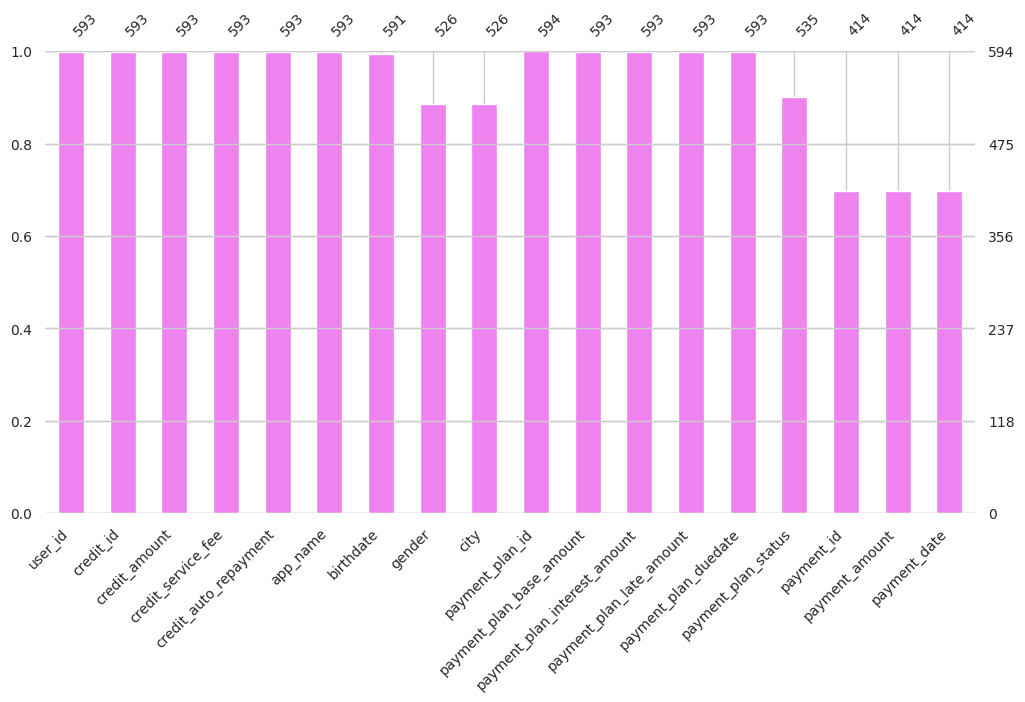

In [723]:
msno.bar(df, color="violet", figsize=(12, 6), fontsize=10)

In [724]:
# Replacing missing values in the 'gender' and 'city' columns with 'Unknown'
df["gender"].fillna("unknown",inplace=True)
df["city"].fillna("unknown",inplace=True)

 We could have removed the rows with missing data in gender and city columns or filled them using the mode (most frequent value),
but I chose to fill them with 'Unknown' to avoid dropping data and to preserve the original distribution,
ensuring that no assumptions are made about the missing values.

In [725]:
# Missing value in user_id
df[df["user_id"].isna()]

,user_id,credit_id,credit_amount,credit_service_fee,credit_auto_repayment,app_name,birthdate,gender,city,payment_plan_id,payment_plan_base_amount,payment_plan_interest_amount,payment_plan_late_amount,payment_plan_duedate,payment_plan_status,payment_id,payment_amount,payment_date
581,NaN,NaN,NaN,NaN,NaN,NaN,NaT,unknown,unknown,97176,NaN,NaN,NaN,NaT,NaN,85587.0,90.72,2021-11-03 18:33:13


The record with payment_plan_id 97176 exists in the payment dataset, but it is absent from both the payment_plan and user datasets. Consequently, after joining the datasets, the columns such as user_id, credit_id, credit_amount, credit_service_fee, credit_auto_repayment, app_name, birthdate, gender, and city contain missing values.I intend to delete this row because the lack of essential information undermines the integrity of the dataset.

In [726]:
df.dropna(subset=['user_id'],inplace=True)

Missing values in Payment_plan_status
*   Unpaid: Due date not reached, unpaid.
*   Late: Due date passed, unpaid.
*   Due date reached or passed, paid.

We will conduct some analyses to fill the missing values in the payment_plan_status.




In [727]:
df["payment_plan_status"].unique()

array(['UNPAID', 'PAID', 'LATE', nan], dtype=object)

In [728]:
# There are entries with a payment record but a missing payment_plan_status
df[(df['payment_plan_status'].isna()) & (df['payment_id'].notna())]

,user_id,credit_id,credit_amount,credit_service_fee,credit_auto_repayment,app_name,birthdate,gender,city,payment_plan_id,payment_plan_base_amount,payment_plan_interest_amount,payment_plan_late_amount,payment_plan_duedate,payment_plan_status,payment_id,payment_amount,payment_date
19,ee3f3e04-1111-1111-1111-9df1dc995efe,23300.0,34.30,0.0,1.0,Dummy App 1,1969-03-13 15:16:32,unknown,unknown,13140,34.30,0.00,0.17,2021-10-31 17:04:46,NaN,92999.0,34.47,2021-11-06 04:47:28
26,22c5d2c9-1111-1111-1111-5cb484bdc869,66108.0,7.60,0.0,1.0,Dummy App 1,1983-05-01 18:07:15,unknown,unknown,13840,7.60,0.00,0.01,2021-11-30 07:42:43,NaN,94013.0,7.61,2021-12-02 04:11:35
37,e7c4c52c-1111-1111-1111-1caf465c7dcd,67008.0,47.75,0.0,0.0,Dummy App 1,1988-09-12 00:13:40,unknown,unknown,15249,47.75,0.00,0.33,2022-01-05 13:49:31,NaN,36345.0,48.08,2022-01-13 10:49:34
46,3d218944-1111-1111-1111-dd528ade495c,24968.0,163.95,0.0,1.0,Dummy App 1,1965-04-06 03:59:04,unknown,unknown,16376,163.95,0.00,0.00,2021-11-26 17:04:56,NaN,47876.0,163.95,2021-11-22 07:34:58
48,234a4125-1111-1111-1111-99a3937a1ecc,56121.0,29.15,0.0,1.0,Dummy App 1,1989-02-28 03:30:46,unknown,unknown,16415,29.15,0.00,0.00,2021-06-01 10:19:19,NaN,70601.0,29.15,2021-06-01 16:24:19
70,09888bbe-1111-1111-1111-72021168cc9e,16300.0,2.95,0.0,1.0,Dummy App 1,1981-09-14 20:31:03,unknown,unknown,20224,2.95,0.00,0.00,2021-08-22 20:38:26,NaN,65118.0,2.95,2021-07-26 11:09:36
94,c4b35218-1111-1111-1111-0152eeb2c45f,59623.0,189.72,0.0,1.0,Dummy App 1,1984-03-14 01:52:32,unknown,unknown,23887,189.72,0.00,0.00,2021-07-09 13:06:15,NaN,30038.0,189.72,2021-06-11 05:54:06
106,9e42a468-1111-1111-1111-f0f7d5a9ad7f,72873.0,20.80,0.0,1.0,Dummy App 1,1980-10-25 19:56:53,unknown,unknown,25699,20.80,0.00,0.00,2021-12-04 17:49:45,NaN,38847.0,20.80,2021-12-03 14:05:48
112,5a748f24-1111-1111-1111-540deb6a5938,43117.0,369.96,0.0,1.0,Dummy App 1,1969-11-15 03:52:48,unknown,unknown,27125,369.96,0.00,0.00,2022-01-04 18:29:42,NaN,66245.0,369.96,2021-12-08 08:10:17
120,1ddccacc-1111-1111-1111-de05fd293612,90554.0,62.30,0.0,1.0,Dummy App 1,1972-06-03 01:14:44,unknown,unknown,28768,62.30,0.00,0.00,2021-12-24 18:45:00,NaN,61305.0,62.30,2021-12-25 04:36:50


In [729]:
# We fill the missing values in the payment_plan_status column with 'PAID' for those rows that have a non-missing payment_id.
df.loc[df['payment_plan_status'].isna() & df['payment_id'].notna(), 'payment_plan_status'] = 'PAID'

To evaluate the missing values in payment_plan_status as either UNPAID or LATE, we will first analyze the date on which the records were collected. This analysis will be based on the available UNPAID and LATE data relative to payment_plan_duedate. By doing so, we will be able to accurately determine the appropriate status for each record. This approach ensures that missing payment statuses are assigned correctly based on the relevant date information.

In [730]:
max_late_duedate = df[df['payment_plan_status'] == 'LATE']['payment_plan_duedate'].max()
min_unpaid_duedate = df[df['payment_plan_status'] == 'UNPAID']['payment_plan_duedate'].min()
print("Maximum Late Due Date: ",max_late_duedate)
print("Minimum Unpaid Due Date: ",min_unpaid_duedate)

Maximum Late Due Date:  2022-01-19 19:48:17
Minimum Unpaid Due Date:  2022-01-20 08:03:32




*   max_late_due_date: This is the latest payment date for records classified as LATE. If a record was collected after this date, it can be evaluated as LATE.
*   min_unpaid_due_date: This is the earliest payment date for records classified as UNPAID. If a record was collected before this date, it can be evaluated as UNPAID.

Within this framework, the date on which the record was collected should be greater than max_late_due_date and less than min_unpaid_due_date.(between 2022-01-19 19:48:17 and 2022-01-20 08:03:32)

In [731]:
# Filling as LATE
df.loc[
    (df['payment_plan_status'].isna()) &
    (df['payment_plan_duedate'] <= max_late_duedate),
    'payment_plan_status'] = 'LATE'

# Filling as UNPAID
df.loc[
    (df['payment_plan_status'].isna()) &
    (df['payment_plan_duedate'] >= min_unpaid_duedate),
    'payment_plan_status'] = 'UNPAID'

In [732]:
df[(df['payment_plan_status'] == 'PAID') & (df['payment_id'].isna())]

,user_id,credit_id,credit_amount,credit_service_fee,credit_auto_repayment,app_name,birthdate,gender,city,payment_plan_id,payment_plan_base_amount,payment_plan_interest_amount,payment_plan_late_amount,payment_plan_duedate,payment_plan_status,payment_id,payment_amount,payment_date
201,73a8943a-1111-1111-1111-0d27e443dc8d,13385.0,499.45,0.0,0.0,Dummy App 1,1961-12-05 21:35:23,male,İstanbul,39649,499.45,0.0,0.67,2022-01-18 12:13:20,PAID,NaN,NaN,NaT
332,4430cb53-1111-1111-1111-8b798ebc4de3,50657.0,402.81,0.0,1.0,Dummy App 1,1975-12-12 04:40:16,male,İstanbul,59670,402.81,0.0,0.00,2022-01-19 18:14:36,PAID,NaN,NaN,NaT
485,bc4dfadb-1111-1111-1111-b15d0f99f673,60190.0,256.96,0.0,1.0,Dummy App 1,1997-02-26 21:16:24,male,İzmir,82865,256.96,0.0,2.74,2022-01-11 11:30:27,PAID,NaN,NaN,NaT


There are rows where payment_plan_status is 'PAID', but both payment_id, payment_amount, and payment_date are missing, indicating that the payment records are not available in the payment dataset. I intend to delete these rows because the absence of essential payment information compromises the integrity and reliability of the dataset. Without these details, it is impossible to validate the payment status accurately, which could lead to potential discrepancies in any analyses performed on the data.


In [733]:
# Deleting rows where payment_plan_status is 'PAID' and payment_id is missing
df = df[~((df['payment_plan_status'] == 'PAID') & (df['payment_id'].isna()))]

In [734]:
# Missing values in birthdate
df[df['birthdate'].isna()]

,user_id,credit_id,credit_amount,credit_service_fee,credit_auto_repayment,app_name,birthdate,gender,city,payment_plan_id,payment_plan_base_amount,payment_plan_interest_amount,payment_plan_late_amount,payment_plan_duedate,payment_plan_status,payment_id,payment_amount,payment_date
188,232dd4db-1111-1111-1111-5ff8451225a4,80097.0,220.60,0.0,0.0,Dummy App 1,NaT,unknown,unknown,38195,220.60,0.0,0.00,2021-12-18 09:23:40,PAID,24364.0,220.6,2021-12-16 06:52:15
448,30307faf-1111-1111-1111-d3ae1e971cc4,41606.0,15.58,0.0,1.0,Dummy App 1,NaT,unknown,unknown,75648,15.58,0.0,0.02,2021-08-30 13:26:52,PAID,71426.0,15.6,2021-09-01 12:24:37


In [735]:

# Filling missing birthdate values with the average birthdate of individuals grouped by their payment_plan_status
df['birthdate'].fillna(df['payment_plan_status'].
                       map(df.groupby('payment_plan_status')['birthdate'].mean()), inplace=True)

In [736]:
df.isnull().sum()

,0
user_id,0
credit_id,0
credit_amount,0
credit_service_fee,0
credit_auto_repayment,0
app_name,0
birthdate,0
gender,0
city,0
payment_plan_id,0


In [737]:
df[(df["payment_plan_status"] != "PAID") & (df["payment_id"].notna())]

,user_id,credit_id,credit_amount,credit_service_fee,credit_auto_repayment,app_name,birthdate,gender,city,payment_plan_id,payment_plan_base_amount,payment_plan_interest_amount,payment_plan_late_amount,payment_plan_duedate,payment_plan_status,payment_id,payment_amount,payment_date


There are 177 missing values in the payment_id, payment_amount, and payment_date columns. Since the corresponding payment_plan_status for these entries is either 'UNPAID' or 'LATE', these missing values are expected, as no payment has been completed. Therefore, these values do not need to be filled and can remain as they are to accurately reflect the status.

Moreover, deleting these rows would result in losing important records with 'UNPAID' or 'LATE' statuses. To preserve the dataset's integrity and enable proper analysis, these records will be kept.


# Creating New Features

I will create variables that will help derive insights from the dataset during the analysis phase. These variables are designed to capture relevant information that can help in understanding patterns and relationships within the data. By incorporating these new variables, we can enhance the depth of our analysis and improve the interpretability of our findings.

To create the age variable, it is necessary to determine the date on which the dataset was collected. In our previous analysis of missing data, we evaluated the date of data collection based on the max_late_due_date and min_unpaid_due_date. Assuming that the dataset was collected within the timeframe between these dates, we will consider this date as January 20, 2022, 00:00 to maintain consistency in our analysis. This assumption is consistent with the payment plan dates for LATE and UNPAID statuses, and we will calculate the age variable using the difference between this date and the birth date.

In [738]:
# Reference date for age calculation
reference_date = pd.to_datetime('2022-01-20 00:00:00')

# Calculating age
df['age'] = (reference_date - df['birthdate']).dt.days // 365

# Creating a variable to capture how late the payment was made compared to the due date
df['payment_delay'] = (df['payment_date'] - df['payment_plan_duedate']).dt.days

# Quartile based on credit amounts
df['quartile'] = pd.qcut(df['credit_amount'], 4, labels=[1, 2, 3, 4])

# Creating age category
df['age_category'] = pd.cut(df['age'], bins=[18, 34, 64, 100], labels=['Young', 'Middle-aged', 'Elderly'], right=True)


# Visualization of Numerical and Categorical Columns After Data Cleaning

In [739]:
cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(df)

# List of Numerical ID columns to exclude
num_id_cols = ["credit_id", "payment_plan_id", "payment_id"]

num_cols = [col for col in num_cols if col not in num_id_cols]

Observations: 590
Variables: 22
cat_cols: 9
num_cols: 12
cat_but_car: 1
num_but_cat: 5


In [740]:
cat_cols

['app_name',
 'gender',
 'city',
 'payment_plan_status',
 'credit_service_fee',
 'credit_auto_repayment',
 'payment_plan_interest_amount',
 'quartile',
 'age_category']

             app_name      Ratio
app_name                        
Dummy App 1       560  94.915254
Dummy App 2        30   5.084746


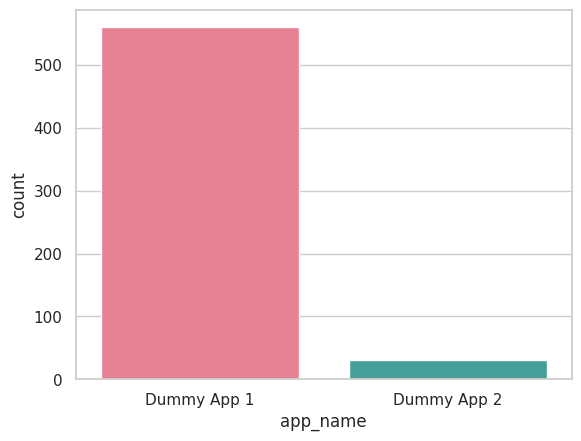

#####################################################################
         gender      Ratio
gender                    
female      262  44.406780
male        261  44.237288
unknown      67  11.355932


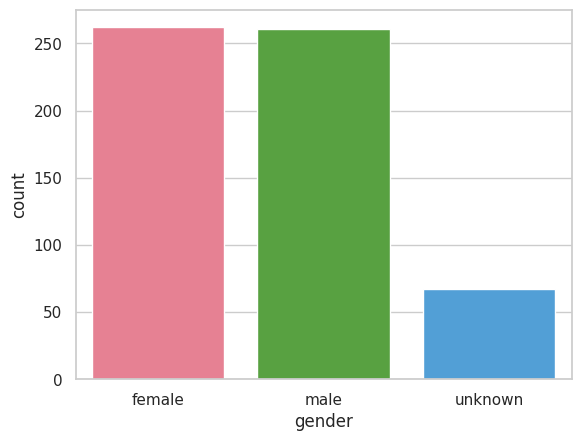

#####################################################################
          city      Ratio
city                     
Adana       97  16.440678
İstanbul    92  15.593220
Trabzon     87  14.745763
Bursa       84  14.237288
Ankara      82  13.898305
İzmir       81  13.728814
unknown     67  11.355932


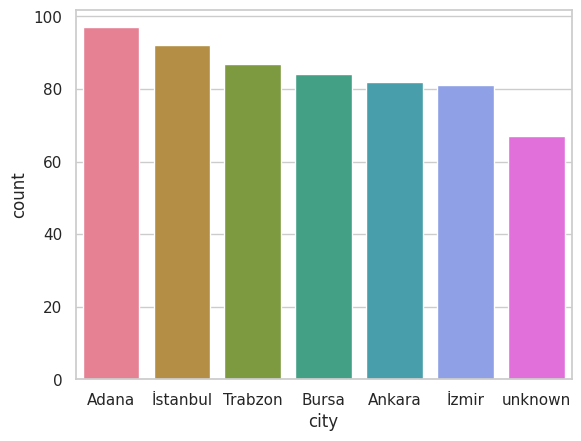

#####################################################################
                     payment_plan_status      Ratio
payment_plan_status                                
PAID                                 413  70.000000
UNPAID                               104  17.627119
LATE                                  73  12.372881


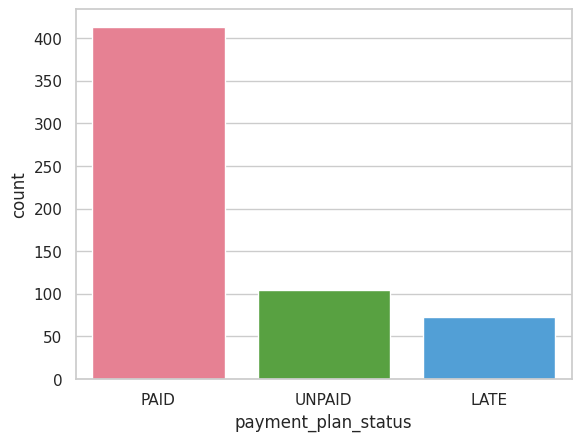

#####################################################################
                    credit_service_fee      Ratio
credit_service_fee                               
0.0                                569  96.440678
1.0                                  9   1.525424
2.5                                  9   1.525424
1.5                                  3   0.508475


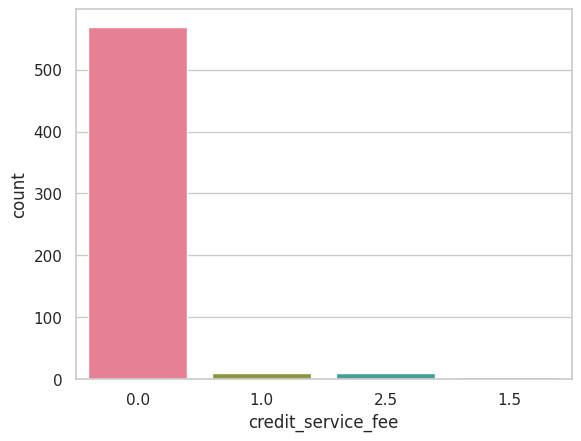

#####################################################################
                       credit_auto_repayment      Ratio
credit_auto_repayment                                  
1.0                                      536  90.847458
0.0                                       54   9.152542


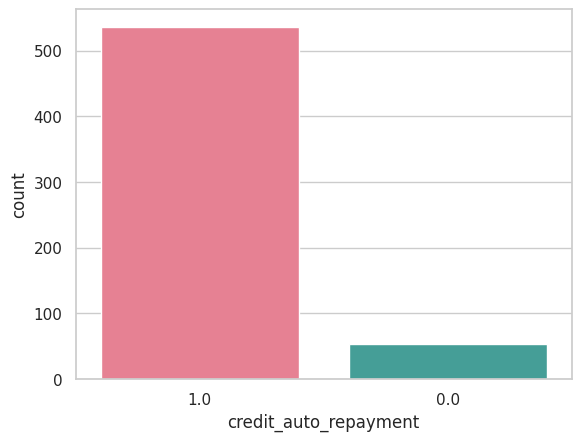

#####################################################################
                              payment_plan_interest_amount      Ratio
payment_plan_interest_amount                                         
0.00                                                   580  98.305085
5.00                                                     4   0.677966
3.75                                                     2   0.338983
4.00                                                     1   0.169492
11.25                                                    1   0.169492
5.94                                                     1   0.169492
1.27                                                     1   0.169492


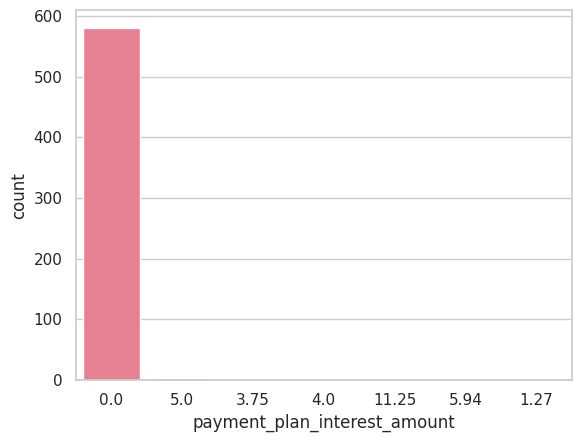

#####################################################################
          quartile      Ratio
quartile                     
1              148  25.084746
4              148  25.084746
2              147  24.915254
3              147  24.915254


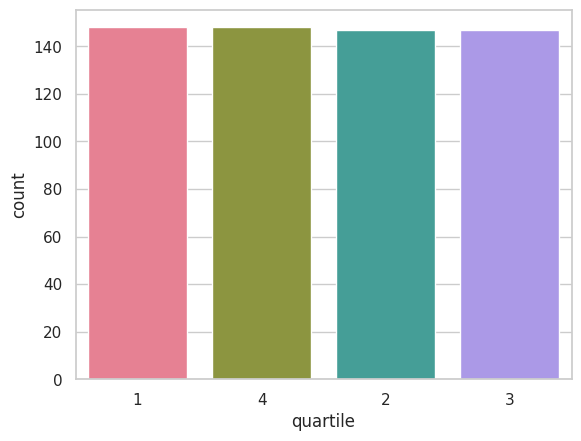

#####################################################################
              age_category      Ratio
age_category                         
Middle-aged            402  68.135593
Young                  188  31.864407
Elderly                  0   0.000000


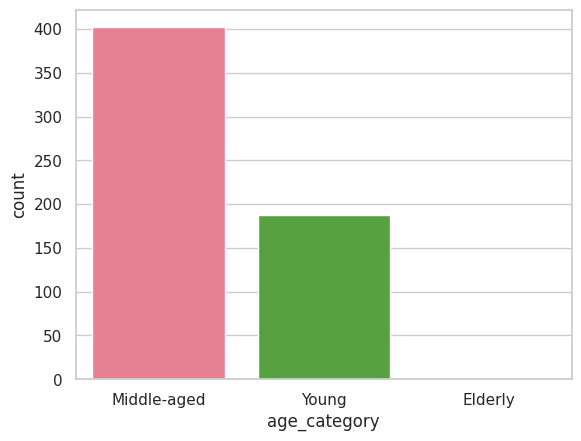

#####################################################################


In [741]:
for col in cat_cols:
    cat_summary(df, col, plot=True)

count    590.000000
mean      95.029407
std      104.982452
min        2.250000
5%         5.690500
10%        9.738000
20%       16.500000
30%       23.985000
40%       39.980000
50%       62.560000
60%       87.198000
70%      101.303000
80%      152.042000
90%      230.557000
95%      330.681500
99%      496.332000
max      500.000000
Name: credit_amount, dtype: float64


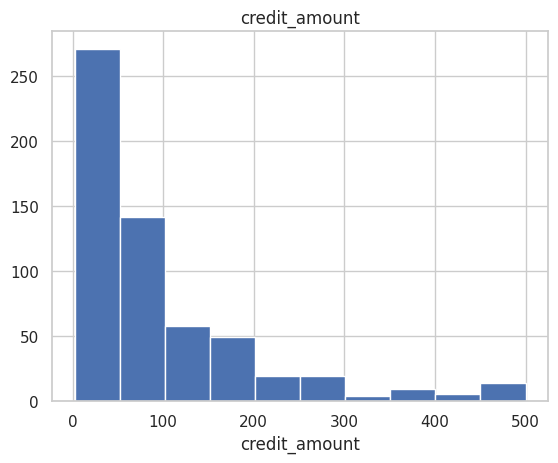

count                              590
mean     1979-12-23 18:31:59.338562432
min                1960-01-15 07:49:03
5%          1962-09-02 12:25:55.350000
10%         1963-11-29 08:40:58.200000
20%      1968-06-13 20:06:05.200000032
30%         1972-06-01 19:18:02.300000
40%      1975-08-24 13:54:03.800000096
50%      1979-10-21 05:57:46.937956224
60%      1983-11-12 00:55:21.399999936
70%         1987-10-02 00:33:57.300000
80%                1991-11-29 04:32:50
90%                1995-08-26 09:12:54
95%         1997-12-24 12:33:54.900000
99%      1999-07-26 22:06:02.950000128
max                1999-12-30 23:39:03
Name: birthdate, dtype: object


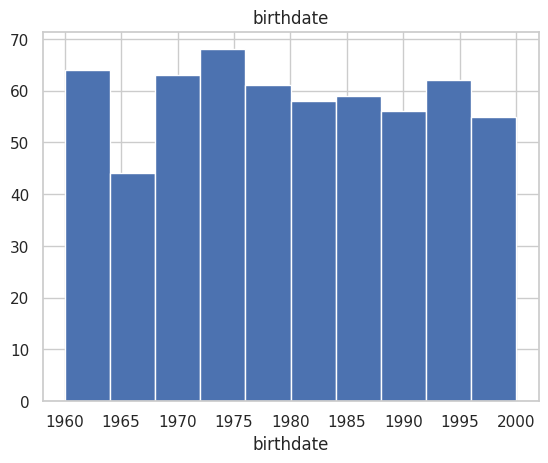

count    590.000000
mean      95.090424
std      104.976647
min        2.250000
5%         5.690500
10%        9.738000
20%       16.500000
30%       23.985000
40%       39.980000
50%       62.560000
60%       87.198000
70%      102.857000
80%      152.042000
90%      230.557000
95%      330.681500
99%      496.332000
max      500.000000
Name: payment_plan_base_amount, dtype: float64


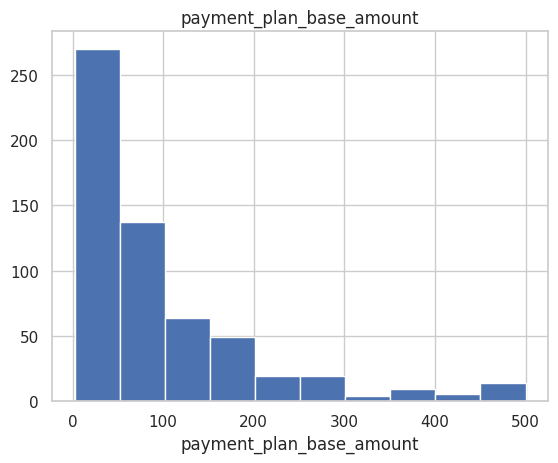

count    590.000000
mean       1.156237
std        4.192383
min        0.000000
5%         0.000000
10%        0.000000
20%        0.000000
30%        0.000000
40%        0.000000
50%        0.000000
60%        0.000000
70%        0.050000
80%        0.602000
90%        2.597000
95%        6.583500
99%       19.885100
max       61.680000
Name: payment_plan_late_amount, dtype: float64


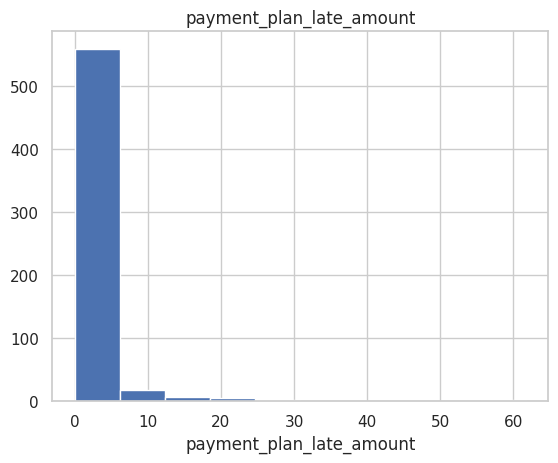

count                              590
mean     2021-11-11 10:11:54.613559040
min                2020-11-14 15:39:09
5%          2021-05-17 23:40:09.500000
10%                2021-07-04 03:58:54
20%                2021-09-05 14:58:36
30%         2021-10-13 14:27:39.300000
40%         2021-11-11 03:21:26.400000
50%         2021-12-05 19:10:54.500000
60%         2021-12-28 18:30:39.400000
70%         2022-01-09 19:03:28.200000
80%         2022-01-22 15:07:01.600000
90%         2022-02-04 06:30:51.600000
95%      2022-02-11 15:03:37.149999872
99%      2022-02-17 20:03:45.990000128
max                2022-02-19 10:26:42
Name: payment_plan_duedate, dtype: object


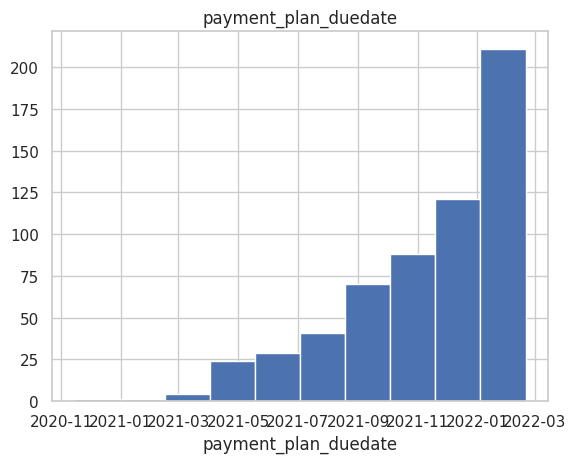

count    413.000000
mean      92.072809
std      103.750796
min        2.500000
5%         4.760000
10%        8.650000
20%       16.000000
30%       23.170000
40%       37.450000
50%       58.650000
60%       80.052000
70%      102.904000
80%      148.708000
90%      232.872000
95%      291.620000
99%      496.161600
max      528.890000
Name: payment_amount, dtype: float64


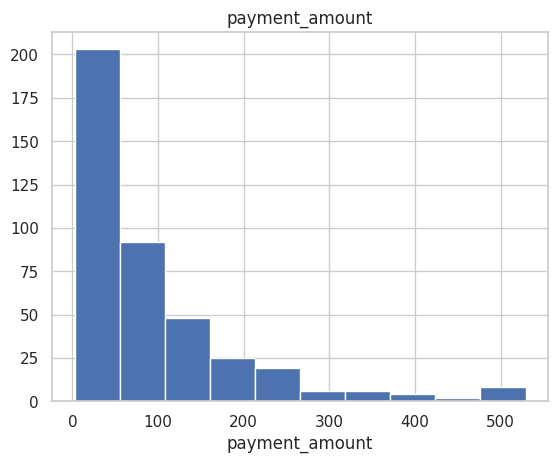

count                              413
mean     2021-10-21 22:39:36.593220608
min                2021-02-14 16:26:14
5%          2021-05-13 09:23:36.200000
10%         2021-06-19 20:39:37.800000
20%         2021-08-11 21:47:30.600000
30%         2021-09-23 09:00:36.600000
40%                2021-10-22 08:54:45
50%                2021-11-13 21:43:53
60%         2021-12-01 11:09:45.400000
70%         2021-12-15 18:58:58.200000
80%         2021-12-29 06:06:11.800000
90%         2022-01-11 11:46:38.400000
95%         2022-01-15 10:19:01.600000
99%         2022-01-19 05:32:26.480000
max                2022-01-20 07:44:26
Name: payment_date, dtype: object


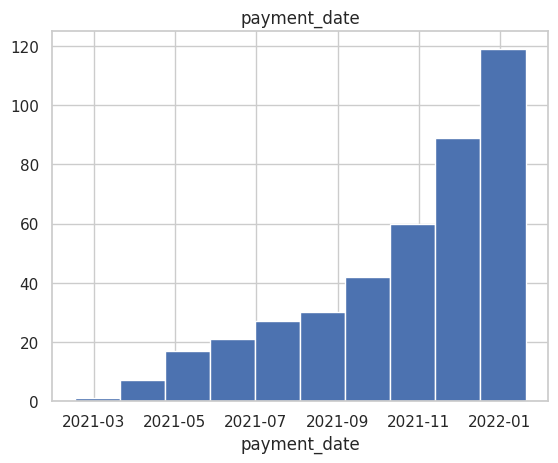

count    590.000000
mean      41.623729
std       11.390765
min       22.000000
5%        24.000000
10%       26.000000
20%       30.000000
30%       34.000000
40%       38.000000
50%       42.000000
60%       46.000000
70%       49.000000
80%       53.000000
90%       58.000000
95%       59.000000
99%       61.000000
max       62.000000
Name: age, dtype: float64


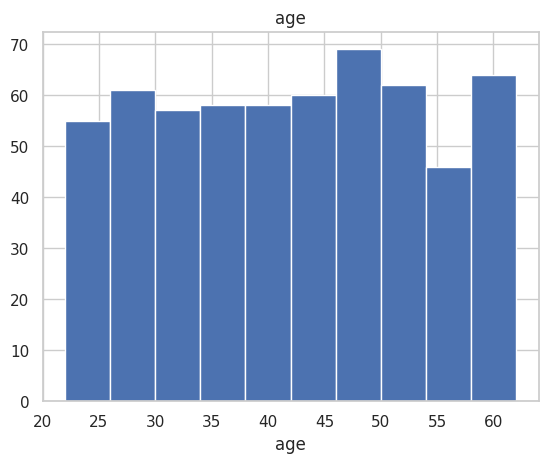

count    413.000000
mean      -0.234867
std       26.927997
min      -31.000000
5%       -29.000000
10%      -26.000000
20%      -19.000000
30%      -12.400000
40%       -7.000000
50%       -2.000000
60%       -1.000000
70%        1.000000
80%        7.000000
90%       29.000000
95%       52.200000
99%       90.640000
max      242.000000
Name: payment_delay, dtype: float64


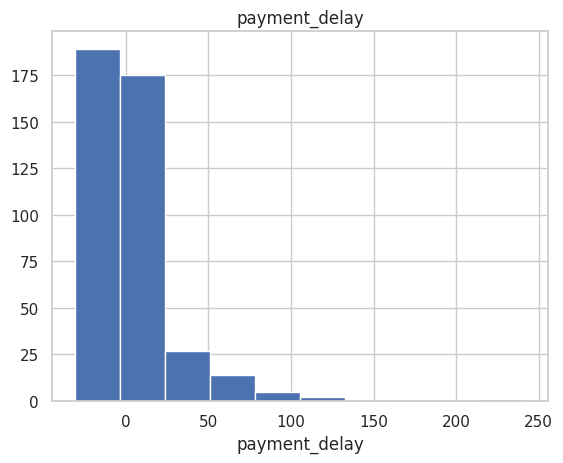

In [742]:
for col in num_cols:
    num_summary(df, col, plot=True)

# Analysis

In [743]:
# To find the number of occurrences of the user_id variable
user_id_counts = df['user_id'].value_counts()

# To identify user_ids that have more than one credit record:
duplicate_user_ids = user_id_counts[user_id_counts > 1].index.tolist()

# To display rows containing duplicate
duplicate_user = df[df['user_id'].isin(duplicate_user_ids)]

print("Number of duplicate user_ids:", len(duplicate_user_ids))

Number of duplicate user_ids: 18


In [744]:
# 1. Average credit amount of payment_plan_status = paid,late,unpaid credits
average_paid_credit_amount = df[df['payment_plan_status'] == 'PAID']['credit_amount'].mean()
average_unpaid_credit_amount = df[df['payment_plan_status'] == 'UNPAID']['credit_amount'].mean()
average_late_credit_amount = df[df['payment_plan_status'] == 'LATE']['credit_amount'].mean()

print("1. Average credit amount of paid credits:", average_paid_credit_amount)
print("2. Average credit amount of unpaid credits:", average_unpaid_credit_amount)
print("3. Average credit amount of late credits:", average_late_credit_amount)

1. Average credit amount of paid credits: 91.37334140435836
2. Average credit amount of unpaid credits: 105.66846153846154
3. Average credit amount of late credits: 100.55671232876713


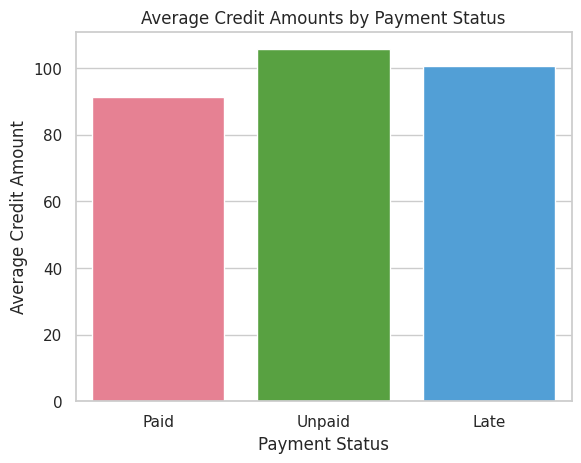

In [745]:
# Bar chart to visualize averages
plt.figure()
sns.barplot(x=['Paid', 'Unpaid', 'Late'], y=[average_paid_credit_amount,average_unpaid_credit_amount,average_late_credit_amount],palette='husl')
plt.title('Average Credit Amounts by Payment Status')
plt.xlabel('Payment Status')
plt.ylabel('Average Credit Amount')
plt.show()

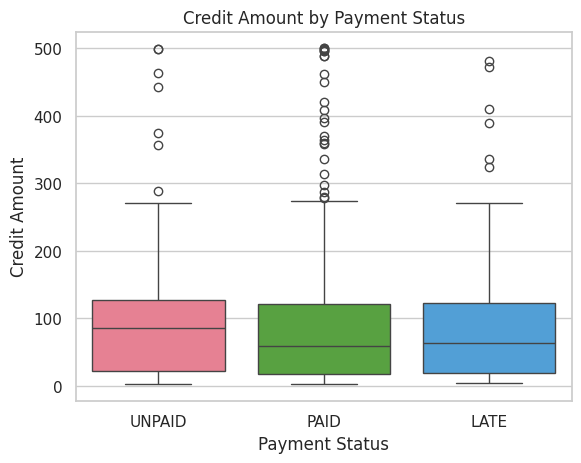

In [746]:
# Credit amount distribution by payment status
sns.boxplot(x='payment_plan_status', y='credit_amount', data=df,palette="husl")
plt.title('Credit Amount by Payment Status')
plt.xlabel('Payment Status')
plt.ylabel('Credit Amount')
plt.show()

There are some outliers at the upper of the boxplot in all three groups. When we compare the median values largest unpaid late and paid respectively.

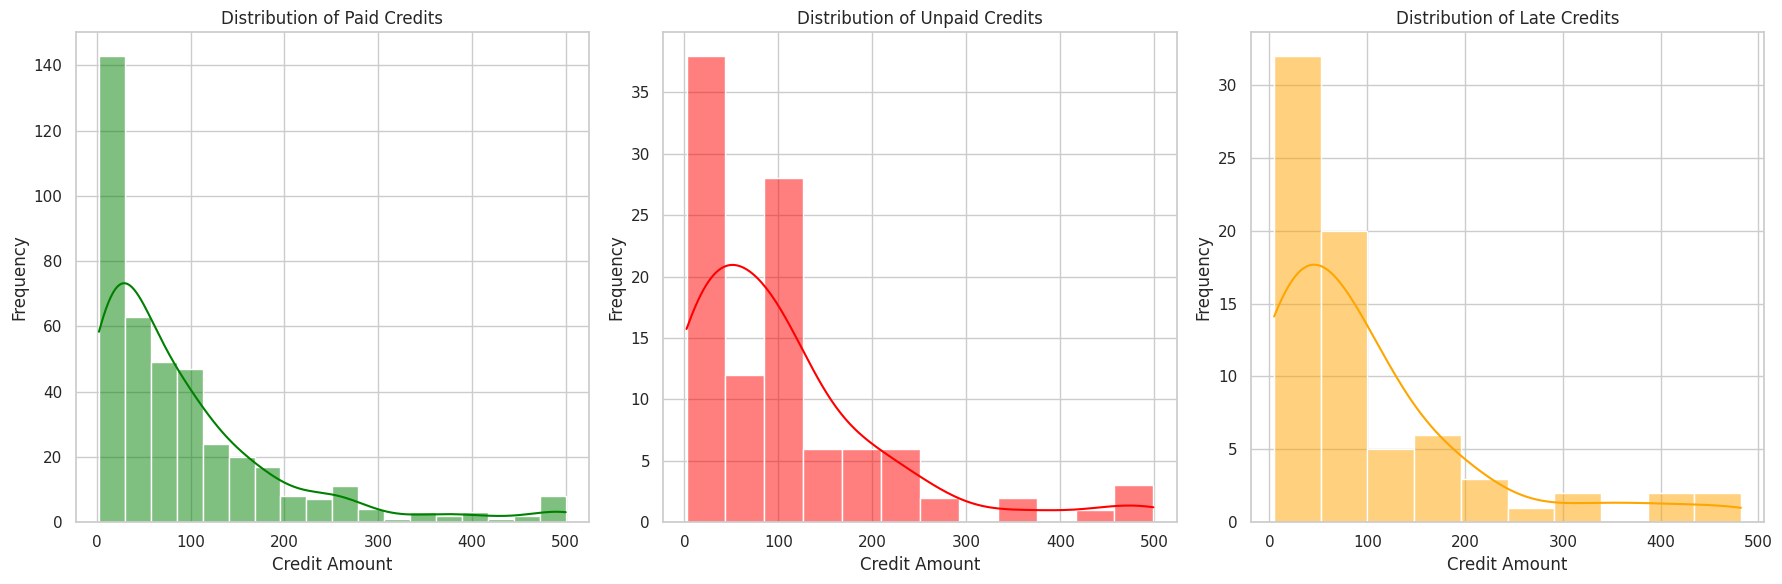

In [747]:
# Distribution of Paid, Unpaid, Late Credits
# Creating separate DataFrames for each payment status
paid_credits = df[df['payment_plan_status'] == 'PAID']
unpaid_credits = df[df['payment_plan_status'] == 'UNPAID']
late_credits = df[df['payment_plan_status'] == 'LATE']

# Create a 1x3 subplot for the three distributions
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Histogram for Paid Credits
sns.histplot(paid_credits['credit_amount'], kde=True, ax=axes[0], color='green')
axes[0].set_title('Distribution of Paid Credits')
axes[0].set_xlabel('Credit Amount')
axes[0].set_ylabel('Frequency')

# Histogram for Unpaid Credits
sns.histplot(unpaid_credits['credit_amount'], kde=True, ax=axes[1], color='red')
axes[1].set_title('Distribution of Unpaid Credits')
axes[1].set_xlabel('Credit Amount')
axes[1].set_ylabel('Frequency')

# Histogram for Late Credits
sns.histplot(late_credits['credit_amount'], kde=True, ax=axes[2], color='orange')
axes[2].set_title('Distribution of Late Credits')
axes[2].set_xlabel('Credit Amount')
axes[2].set_ylabel('Frequency')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [748]:
# 2.For late paid credits (credit is paid after its due date), find average number of days
# after due date. Please do not consider not paid credits
average_payment_delay = df[df["payment_delay"] > 0]['payment_delay'].mean()

print(f"The average payment delay for late payments is: {average_payment_delay:.2f} days")

The average payment delay for late payments is: 26.16 days


In [749]:
# 3. For early paid credits (credit is paid before its due), find average amount.
average_credit_amount = df[df["payment_delay"] < 0 ]['credit_amount'].mean()

print(f"The average credit amount for early paid credits is: {average_credit_amount:.2f}")

The average credit amount for early paid credits is: 90.72


In [750]:
# 4. For early paid credits, find average number of days before due.
average_days_early = df[df["payment_delay"] < 0]['payment_delay'].mean()

# Display the result
print(f"The average number of days before due for early paid credits is: {-average_days_early:.2f} days")


The average number of days before due for early paid credits is: 13.10 days


In [751]:
# 5. Calculating average ages according to payment_plan_status
average_age_early_paid = df[df["payment_delay"] < 0]['age'].mean()
average_age_timely_paid = df[df["payment_delay"] == 0]['age'].mean()
average_age_lately_paid = df[df["payment_delay"] > 0]['age'].mean()
average_age_unpaid = df[df["payment_plan_status"] == "UNPAID"]['age'].mean()
average_age_late = df[df["payment_plan_status"] == "LATE"]['age'].mean()

print(f"The average age for early paid credits is: {average_age_early_paid:.2f} years")
print(f"The average age for timely paid credits is: {average_age_timely_paid:.2f} years")
print(f"The average age for late paid credits is: {average_age_lately_paid:.2f} years")
print(f"The average age for unpaid credits is: {average_age_unpaid:.2f} years")
print(f"The average age for late credits is: {average_age_late:.2f} years")


The average age for early paid credits is: 41.89 years
The average age for timely paid credits is: 38.09 years
The average age for late paid credits is: 42.08 years
The average age for unpaid credits is: 41.85 years
The average age for late credits is: 40.62 years


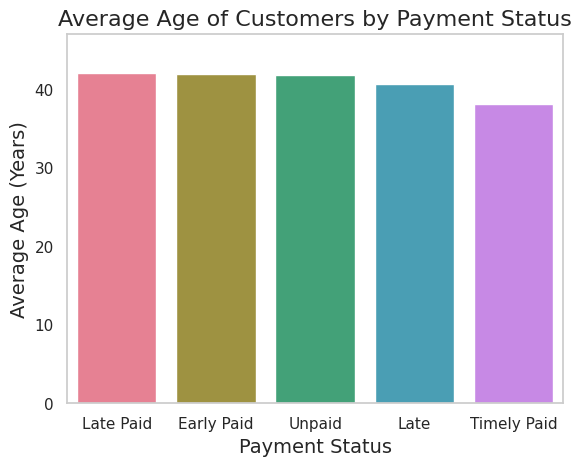

In [752]:
# Visualizing them
age_data = {
    'Payment Status': ['Early Paid', 'Timely Paid', 'Late Paid', 'Unpaid', 'Late'],
    'Average Age': [average_age_early_paid, average_age_timely_paid,
                    average_age_lately_paid, average_age_unpaid, average_age_late]
}

age_df = pd.DataFrame(age_data).sort_values(by='Average Age', ascending=False)

# Creating the bar chart
plt.figure()
sns.barplot(x='Payment Status', y='Average Age', data=age_df, palette='husl')
plt.title('Average Age of Customers by Payment Status', fontsize=16)
plt.xlabel('Payment Status', fontsize=14)
plt.ylabel('Average Age (Years)', fontsize=14)
plt.grid(axis='y')
plt.ylim(0, max(age_df['Average Age']) + 5)
plt.show()

In [753]:
# 7. Divide the users in the given data into four quartiles based on their credit
# amounts. Then, compare the credit counts between users in the lowest quartile (1st
# quartile) and those in the highest quartile (4th quartile). Which quartile has users
# who performed more credits, and what is the difference between them?

# Calculating the credit count for each user by quartile
credit_count = df.groupby(['user_id', 'quartile']).size().reset_index(name='credit_count')

# Filtering to include only 1st and 4th quartiles with credit count greater than 1
filtered_credit_count = credit_count[(credit_count['quartile'].isin([1, 4])) & (credit_count['credit_count'] > 1)]

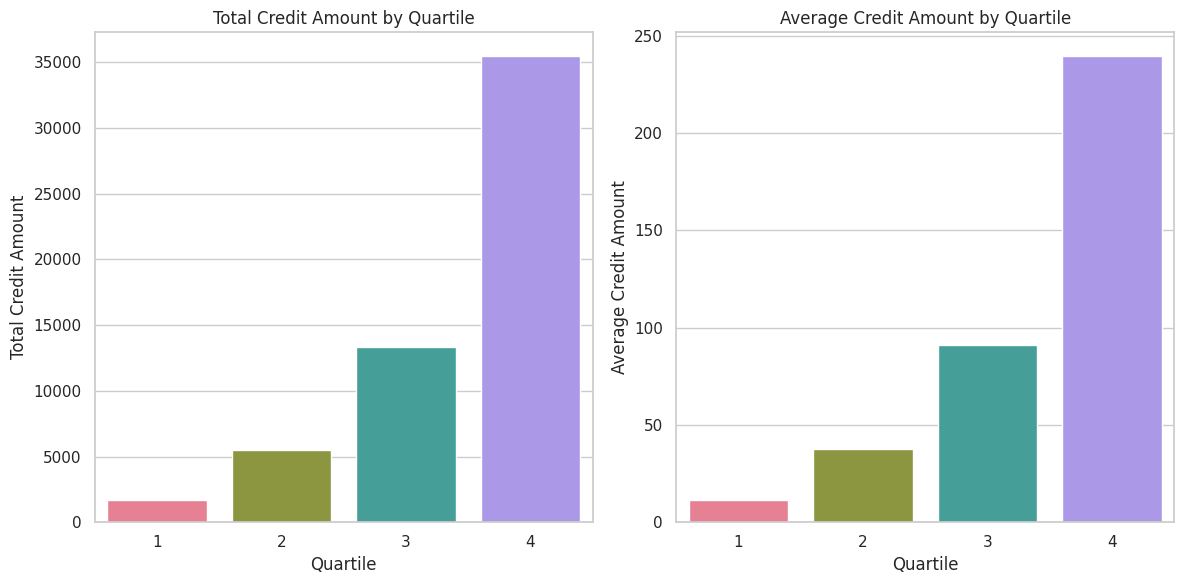

In [754]:
# Calculating total and average credit amounts for each quartile
quartile_summary = df.groupby('quartile')['credit_amount'].agg(['sum', 'mean']).reset_index()
quartile_summary.columns = ['quartile', 'total_credit_amount', 'average_credit_amount']

# Visualization
plt.figure(figsize=(12, 6))

# Total credit amount bar chart
plt.subplot(1, 2, 1)
sns.barplot(x='quartile', y='total_credit_amount', data=quartile_summary, palette='husl')
plt.title('Total Credit Amount by Quartile')
plt.xlabel('Quartile')
plt.ylabel('Total Credit Amount')

# Average credit amount bar chart
plt.subplot(1, 2, 2)
sns.barplot(x='quartile', y='average_credit_amount', data=quartile_summary, palette='husl')
plt.title('Average Credit Amount by Quartile')
plt.xlabel('Quartile')
plt.ylabel('Average Credit Amount')

plt.tight_layout()
plt.show()

In [755]:
filtered_credit_count

,user_id,quartile,credit_count
180,1353830d-1111-1111-1111-60f8f0ac5e37,1,2
504,39268fc9-1111-1111-1111-4e8ae359aed0,1,2
775,583b28c8-1111-1111-1111-e5a02fe5a639,4,2
1952,da51624c-1111-1111-1111-995b00d2708f,1,2


In the first quartile, there are 3 users with a maximum credit count of 2, while in the fourth quartile, there is only 1 person who has taken maximum 2 credits. The 1st quartile has users who performed more credits than the 4th quartile. The reason more users in the first quartile have taken out more than one credit is that the credit amounts in this quartile are lower.

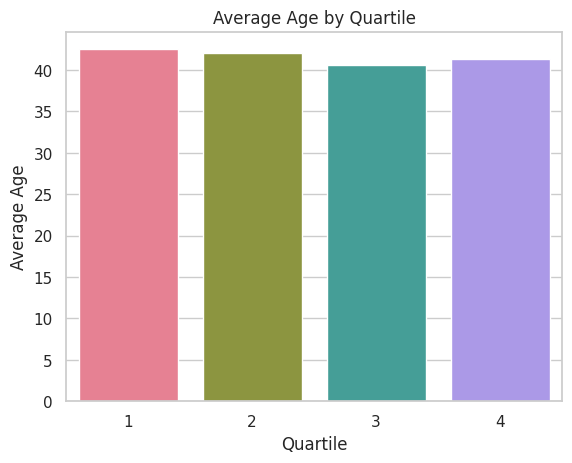

In [756]:
# Calculating the average age by quartile
average_age_by_quartile = df.groupby('quartile')['age'].mean().reset_index()

# Visualize the average age
plt.figure()
sns.barplot(data=average_age_by_quartile, x='quartile', y='age', palette='husl')
plt.title('Average Age by Quartile')
plt.xlabel('Quartile')
plt.ylabel('Average Age')
plt.xticks(rotation=0)
plt.show()

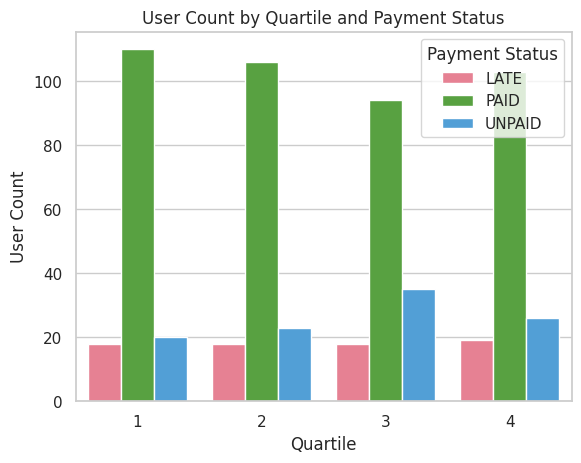

In [757]:
# Calculating user count by payment status
payment_status_counts = df.groupby(['quartile', 'payment_plan_status']).size().reset_index(name='count')

# Visualizing the user count by payment status
plt.figure()
sns.barplot(data=payment_status_counts, x='quartile', y='count', hue='payment_plan_status', palette='husl')
plt.title('User Count by Quartile and Payment Status')
plt.xlabel('Quartile')
plt.ylabel('User Count')
plt.legend(title='Payment Status')
plt.xticks(rotation=0)
plt.show()

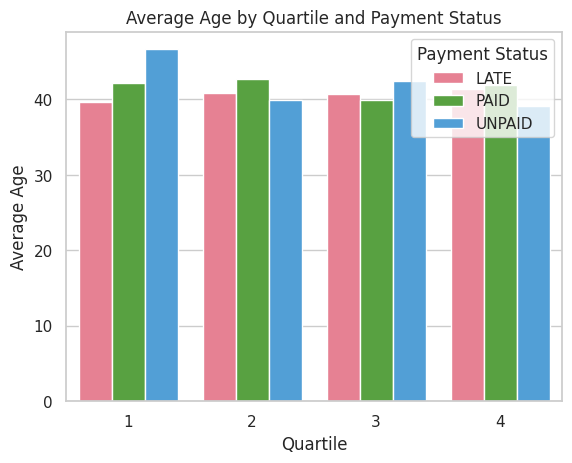

In [758]:
# Calculating average age for each quartile and payment status
average_age = df.groupby(['quartile', 'payment_plan_status'])['age'].mean().reset_index()

# Creating a bar plot
plt.figure()
sns.barplot(data=average_age, x='quartile', y='age', hue='payment_plan_status',palette="husl")
plt.title('Average Age by Quartile and Payment Status')
plt.xlabel('Quartile')
plt.ylabel('Average Age')
plt.legend(title='Payment Status')
plt.xticks(rotation=0)
plt.show()

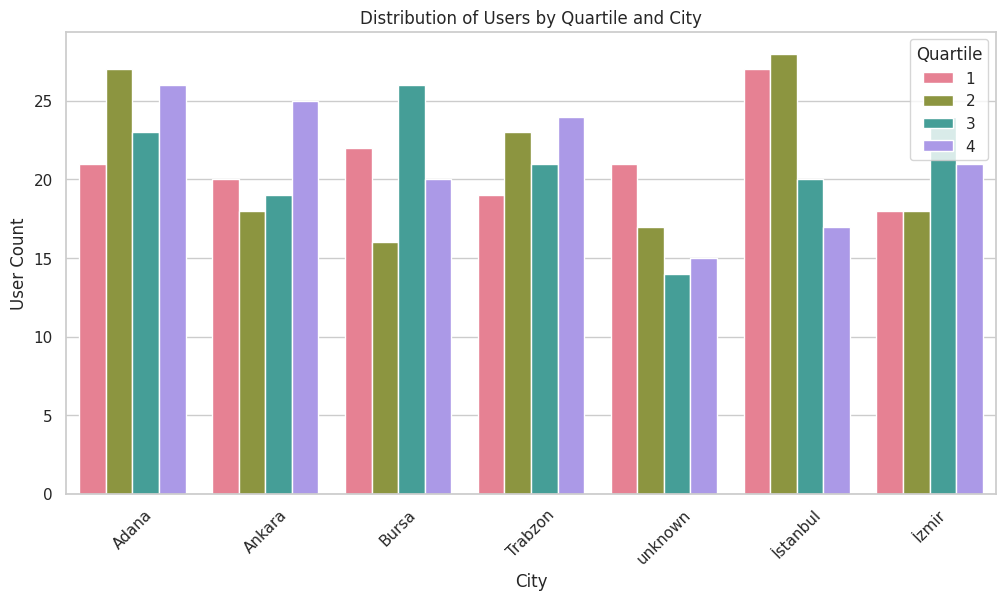

In [759]:
# Counting users by city and quartile
quartile_city_counts = df.groupby(['city', 'quartile']).size().reset_index(name='user_count')

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(data=quartile_city_counts, x='city', y='user_count', hue='quartile', palette='husl')
plt.title('Distribution of Users by Quartile and City')
plt.xlabel('City')
plt.ylabel('User Count')
plt.xticks(rotation=45)
plt.legend(title='Quartile', loc='upper right')
plt.show()

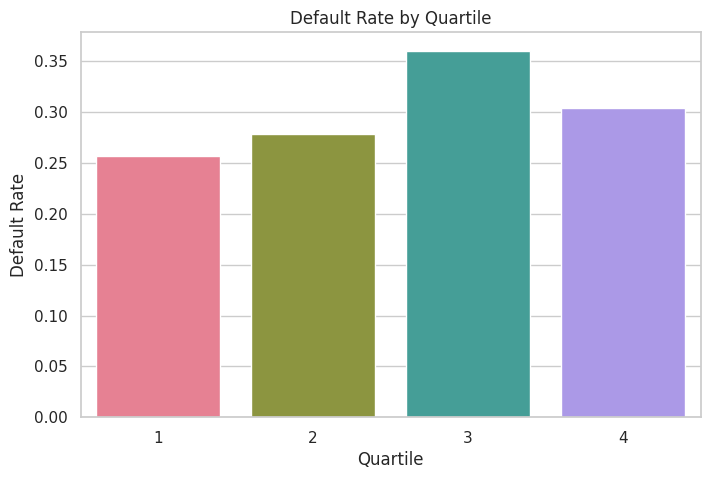

In [760]:
# Default rate analysis
# Default rate by quartile
quartile_default_rate = df.groupby('quartile')['payment_plan_status'].apply(lambda x: (x != 'PAID').mean()).reset_index(name='default_rate')

plt.figure(figsize=(8, 5))
sns.barplot(data=quartile_default_rate, x='quartile', y='default_rate', palette='husl')
plt.title('Default Rate by Quartile')
plt.xlabel('Quartile')
plt.ylabel('Default Rate')
plt.show()

Quartile 1: Individuals in this quartile have the lowest default rate, suggesting they are the most consistent with their loan payments.

Quartile 2: While slightly higher than Quartile 1, the default rate in this quartile indicates a generally low-risk group.

Quartile 3: This quartile has the highest default rate, suggesting that individuals in this group struggle the most with loan repayments.

Quartile 4: Although the default rate is slightly lower than Quartile 3, individuals in this quartile are still considered a high-risk group.

In [761]:
df["age"].min()
df["age"].max()

print(f"Minimum age: {df['age'].min()}")
print(f"Maximum age: {df['age'].max()}")

Minimum age: 22
Maximum age: 62


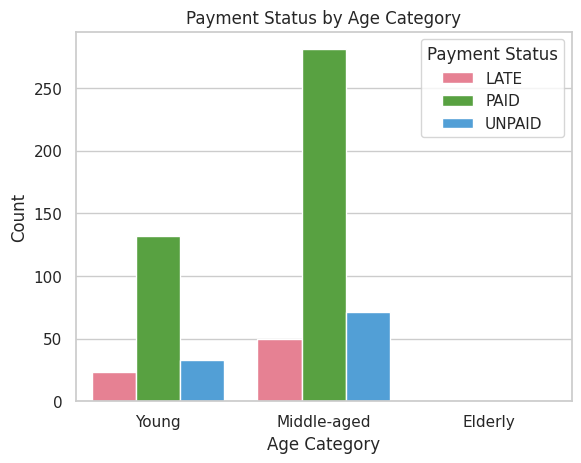

In [762]:
# visualizing payment status by age category
# Creating a count of payment statuses by age category
payment_status_by_age_category = df.groupby(['age_category', 'payment_plan_status']).size().reset_index(name='count')

# Plot
plt.figure()
sns.barplot(data=payment_status_by_age_category, x='age_category', y='count', hue='payment_plan_status', palette='husl')
plt.title('Payment Status by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.legend(title='Payment Status')
plt.show()

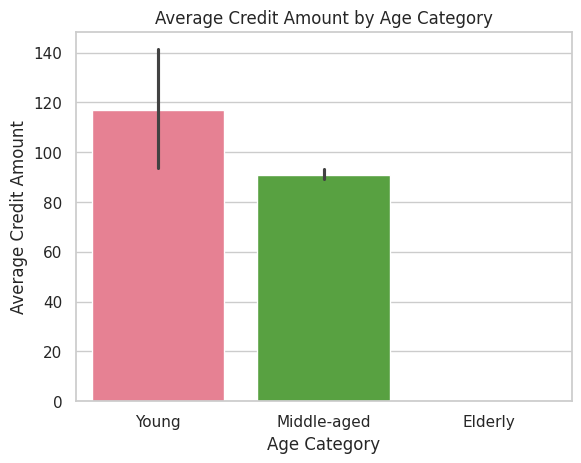

In [763]:
# Visualizing average credit amount by age category
# Calculating the average credit amount for each age category and payment status
average_credit_by_age_category = df.groupby(['age_category', 'payment_plan_status'])['credit_amount'].mean().reset_index()

plt.figure()
sns.barplot(data=average_credit_by_age_category, x='age_category', y='credit_amount', palette='husl')
plt.title('Average Credit Amount by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Average Credit Amount')
plt.show()

The "Middle-aged" category has short error bars, this suggests most young users took similar amounts of credit.
If the "young" category has longer error bars, this indicates more variability, meaning some elderly users took much higher or lower amounts compared to others in that group.

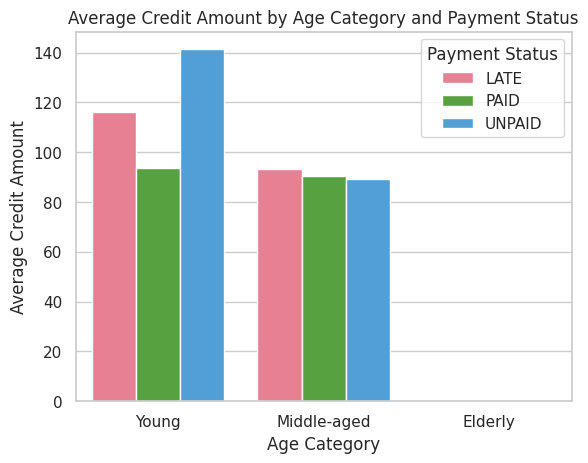

In [764]:
# Visualizing average credit amount by age category

plt.figure()
sns.barplot(data=average_credit_by_age_category, x='age_category', y='credit_amount', hue='payment_plan_status', palette='husl')
plt.title('Average Credit Amount by Age Category and Payment Status')
plt.xlabel('Age Category')
plt.ylabel('Average Credit Amount')
plt.legend(title='Payment Status')
plt.show()

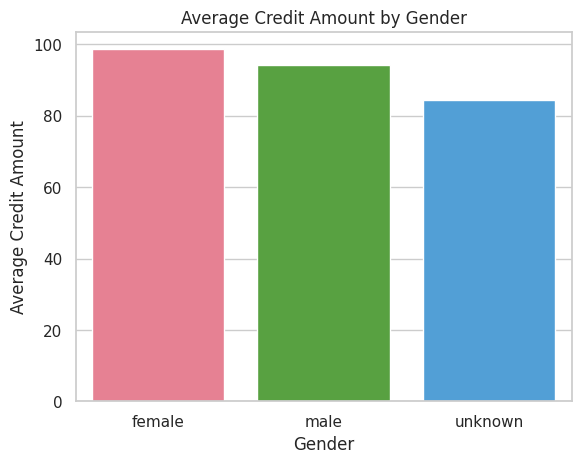

In [765]:
# Average credit amount by gender
avg_credit_by_gender = df.groupby('gender')['credit_amount'].mean().reset_index()

plt.figure()
sns.barplot(data=avg_credit_by_gender, x='gender', y='credit_amount', palette='husl')
plt.title('Average Credit Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Credit Amount')
plt.show()

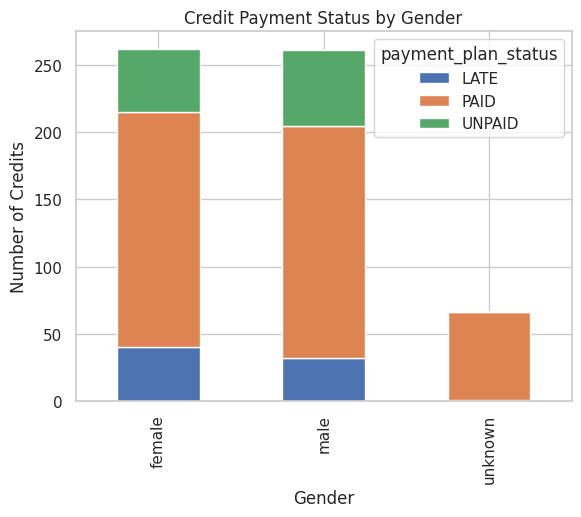

In [766]:
# Credit Behavior by Gender
# Number of credits and payment status by gender
gender_status_counts = df.groupby(['gender', 'payment_plan_status'])['credit_id'].count().unstack().fillna(0)

# Visualization
gender_status_counts.plot(kind='bar', stacked=True)
plt.title('Credit Payment Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Credits')
plt.show()

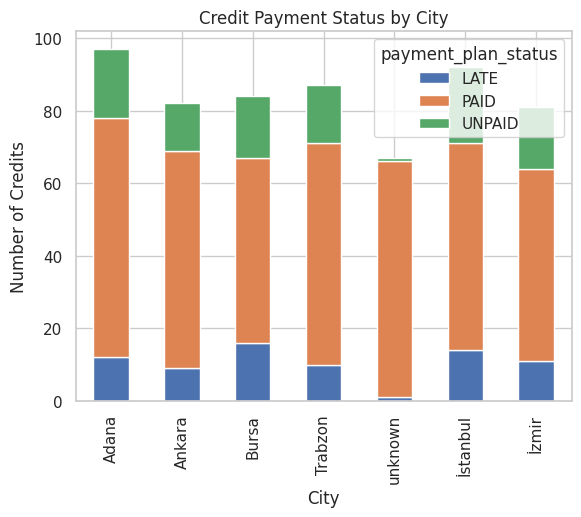

In [767]:
# Credit Behavior by City

# Number of credits and payment status by city
city_status_counts = df.groupby(['city', 'payment_plan_status'])['credit_id'].count().unstack().fillna(0)

# Visualization
city_status_counts.plot(kind='bar', stacked=True)
plt.title('Credit Payment Status by City')
plt.xlabel('City')
plt.ylabel('Number of Credits')
plt.show()

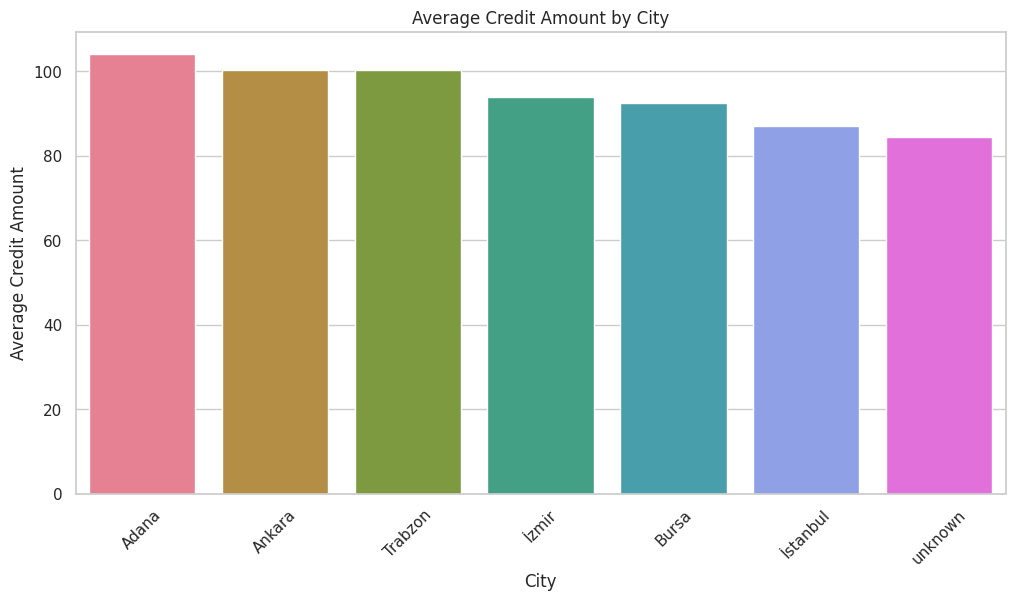

In [768]:
# Calculating average credit amount by city
average_credit_by_city = df.groupby('city')['credit_amount'].mean().reset_index().sort_values(by='credit_amount', ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=average_credit_by_city, x='city', y='credit_amount', palette='husl')
plt.title('Average Credit Amount by City')
plt.xlabel('City')
plt.ylabel('Average Credit Amount')
plt.xticks(rotation=45)
plt.show()

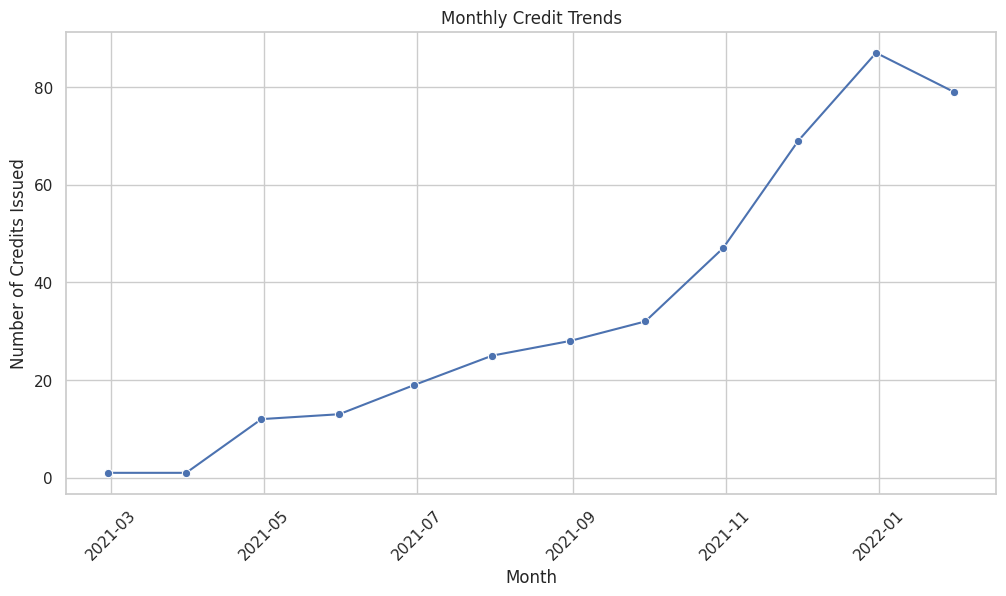

In [769]:
# Monthly Credit Trends
# Group by month and count credits
monthly_trends = df.resample('M', on='payment_date').size().reset_index(name='credit_count')

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_trends, x='payment_date', y='credit_count', marker='o')
plt.title('Monthly Credit Trends')
plt.xlabel('Month')
plt.ylabel('Number of Credits Issued')
plt.xticks(rotation=45)
plt.show()

The graph indicates a generally positive trend in the company's credit lending activities. However, it is crucial to monitor this trend regularly and take necessary measures to ensure its sustainability.